In [1]:
from data.adult_cerebrail_cortex import preprocessing
import giraffe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.io import mmread
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
cache = True

In [3]:
if not cache:
    preprocessing.generate_data()

In [5]:
rna = mmread('data/adult_cerebrail_cortex/raw/Adult_CTX_RNA/matrix.mtx')
expression = rna.todense()[:, 0:2000]
genes = pd.read_csv('data/adult_cerebrail_cortex/raw/Adult_CTX_RNA/genes.tsv', header = None, sep = '\t')
cells = pd.read_csv('data/adult_cerebrail_cortex/raw/Adult_CTX_RNA/barcodes.tsv', header = None)

In [6]:
motif = pd.read_csv("data/adult_cerebrail_cortex/motif.txt", index_col = 0)
ppi = pd.read_csv("data/adult_cerebrail_cortex/ppi.txt", index_col = 0)
accessibility = pd.read_csv("data/adult_cerebrail_cortex/accessibility.txt", index_col = 0).iloc[:, 0:2000]

In [7]:
print(expression.shape)
print(len(genes))
print(len(cells))
print(motif.shape)
print(ppi.shape)
print(accessibility.shape)

(29624, 2000)
29624
15191
(29624, 713)
(713, 713)
(27247, 2000)


In [23]:
model = giraffe.Giraffe(expression, motif.to_numpy(), ppi + np.eye(ppi.shape[0]), iterations = 50, save_computation = True)

In [24]:
R = model.get_regulation()
TFA = model.get_tfa()

In [25]:
R.shape

(29624, 713)

In [13]:
idx = []
for i in accessibility.index:
    idx.append(list(genes[0]).index(i))

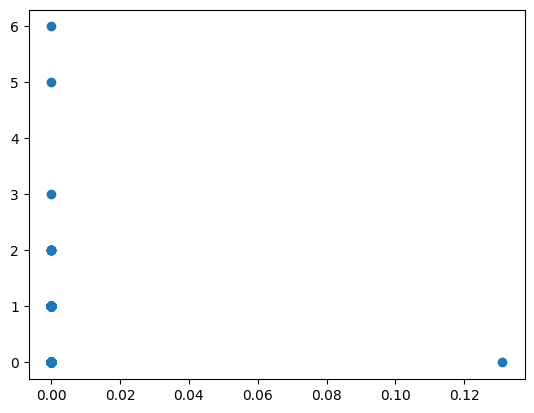

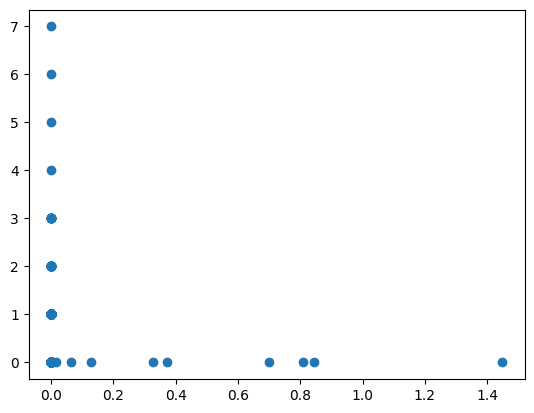

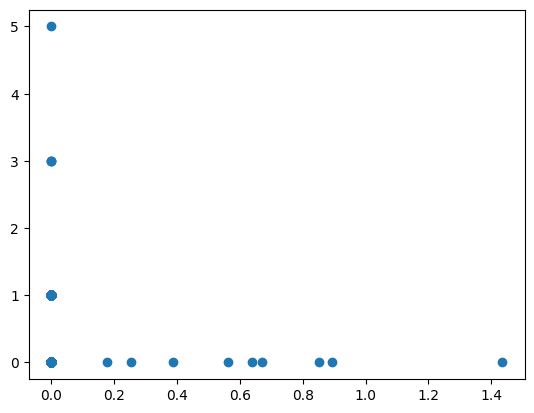

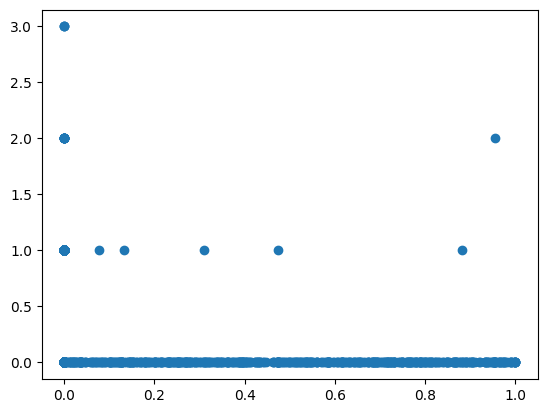

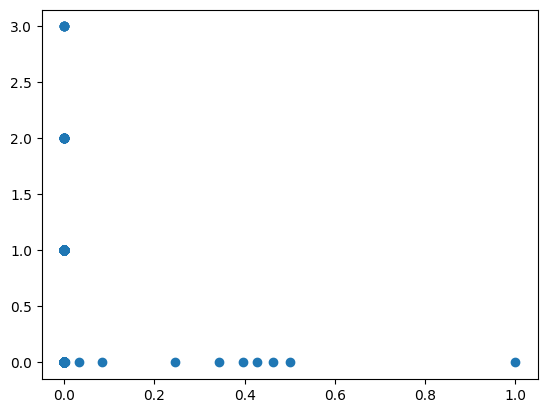

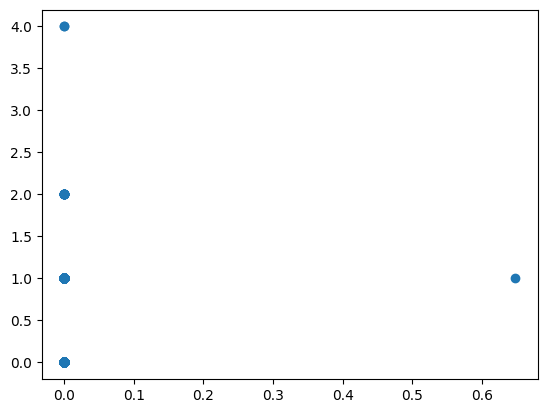

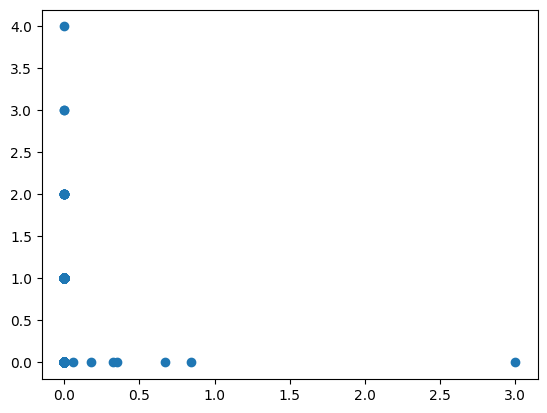

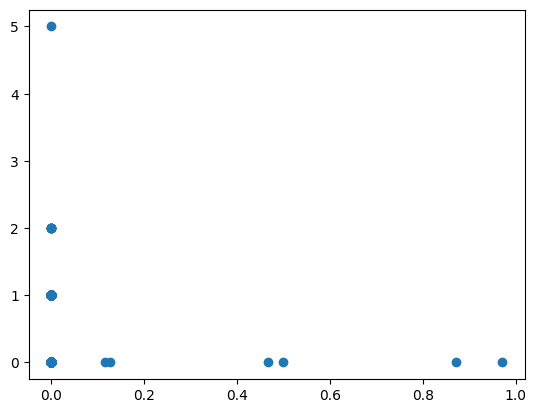

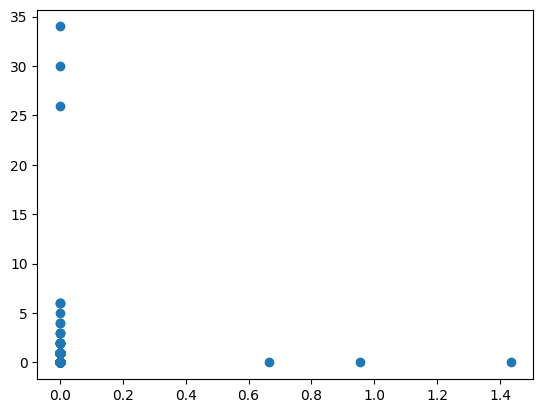

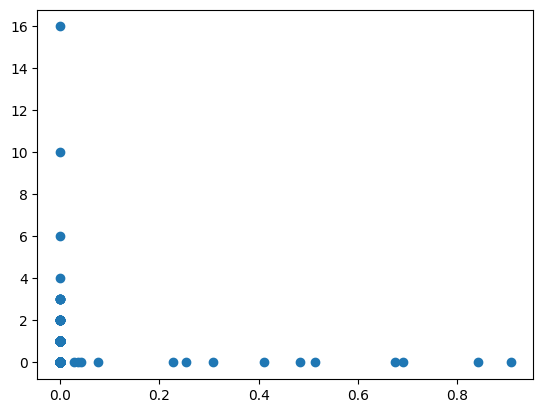

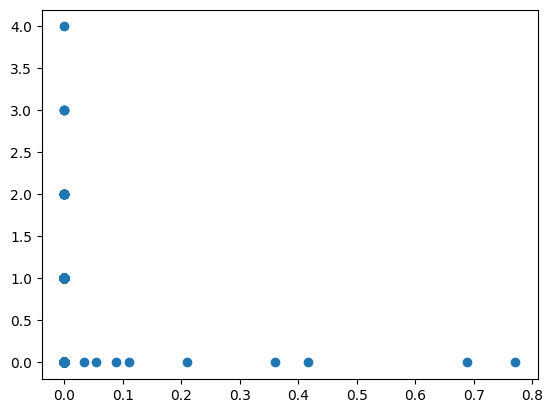

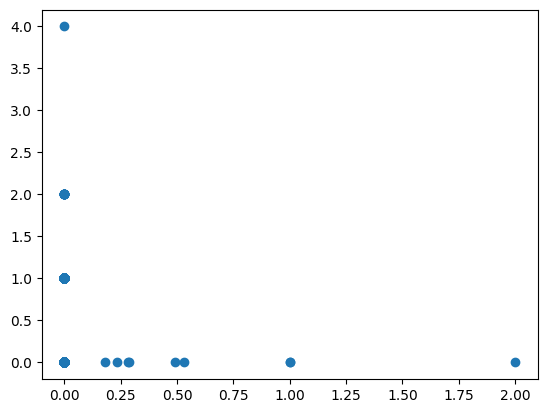

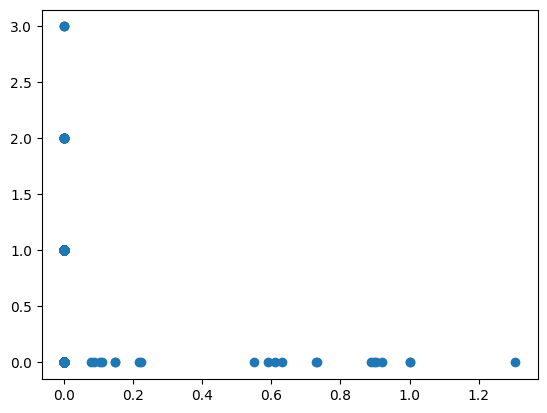

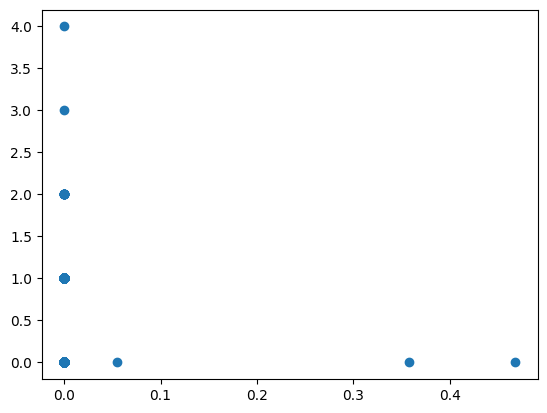

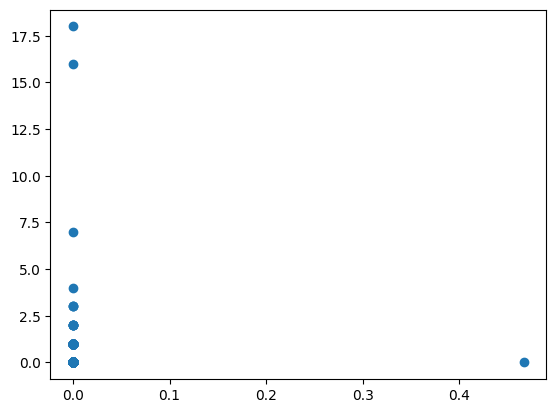

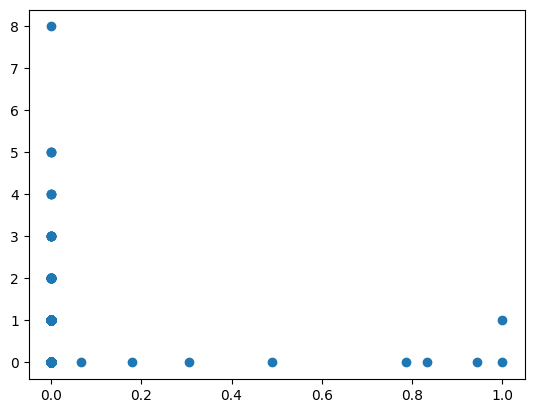

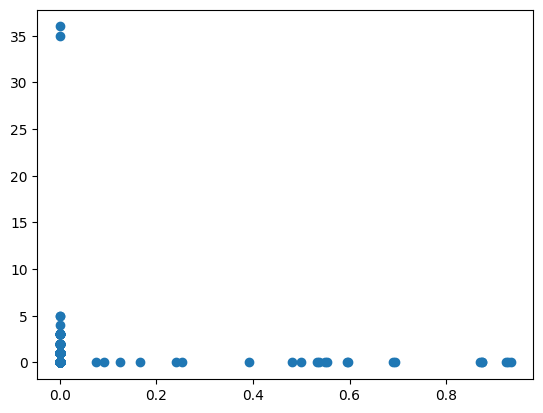

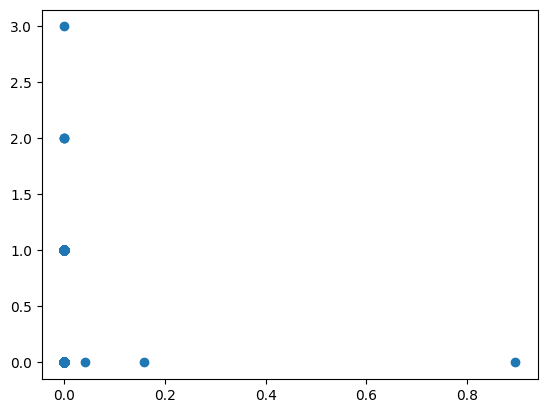

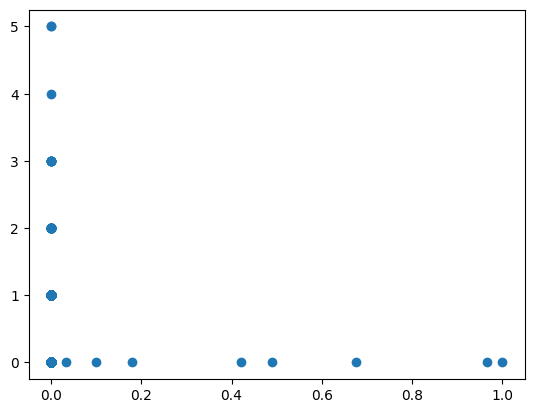

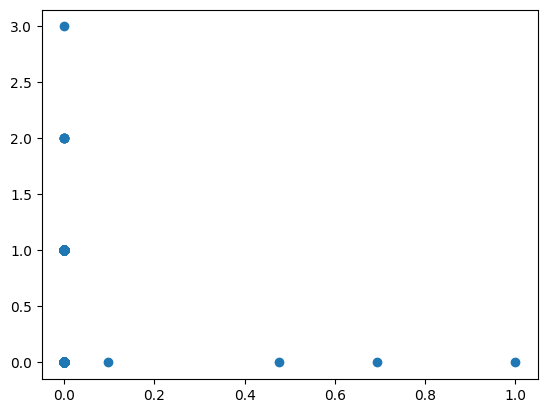

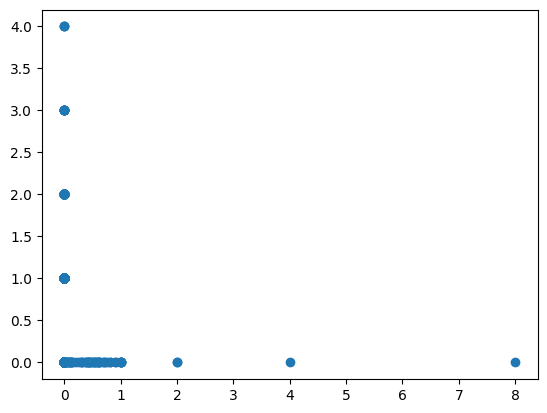

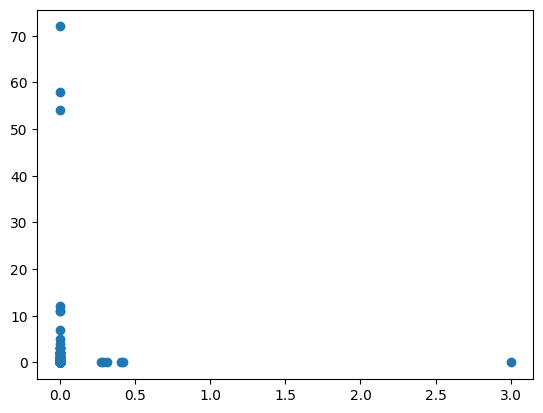

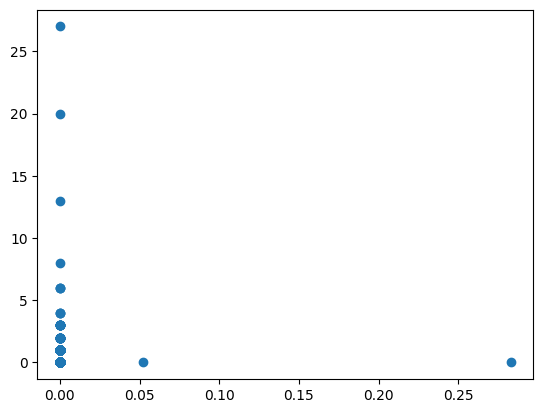

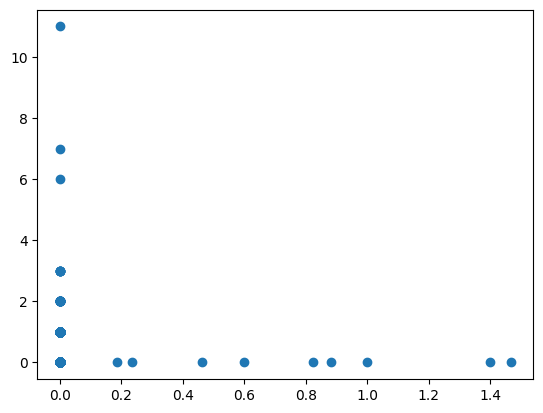

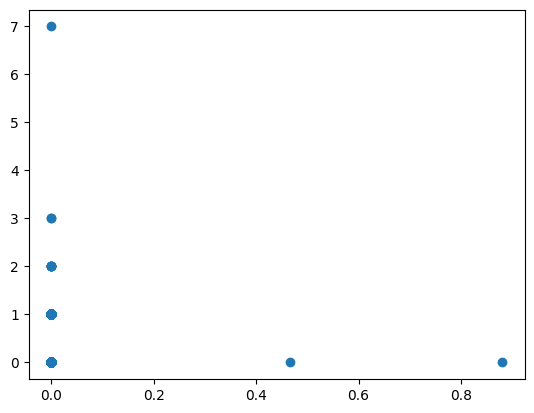

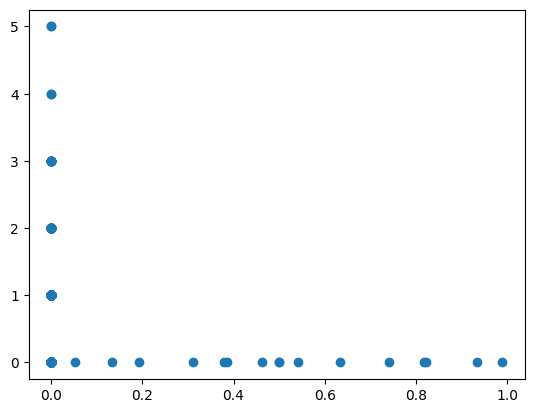

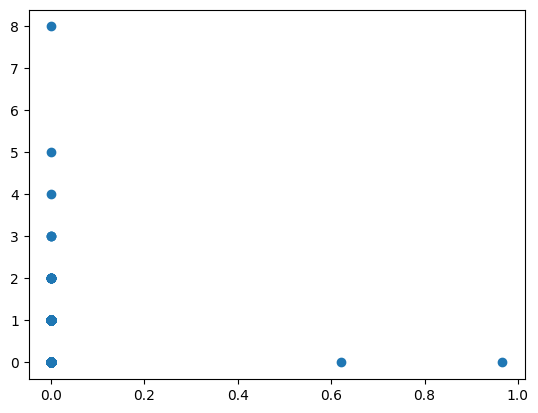

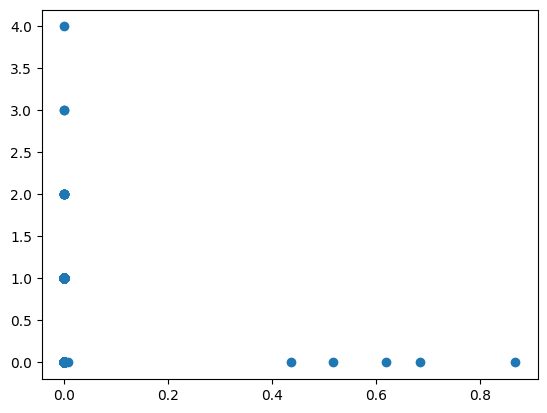

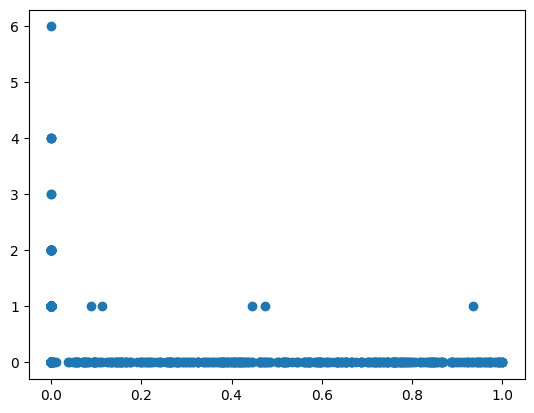

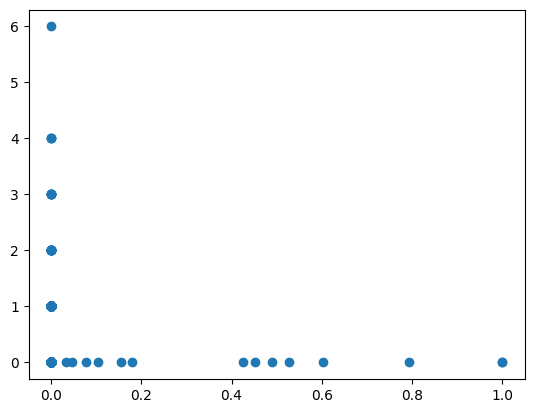

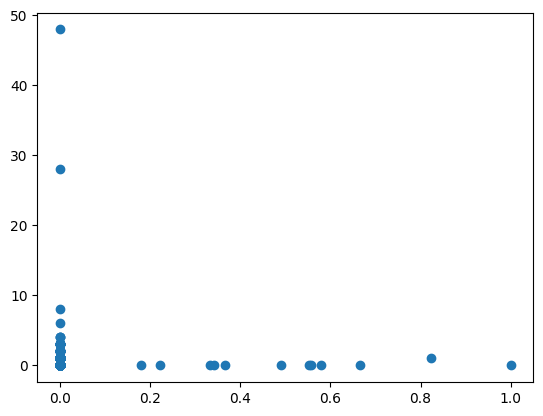

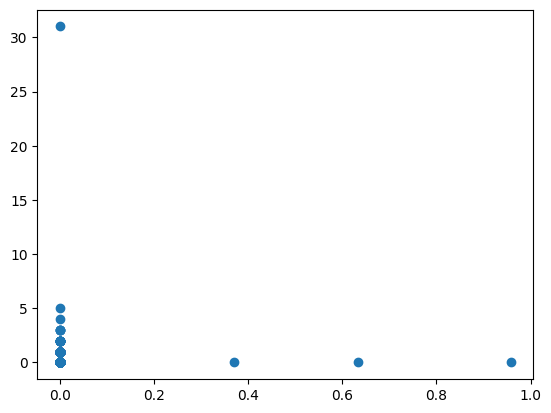

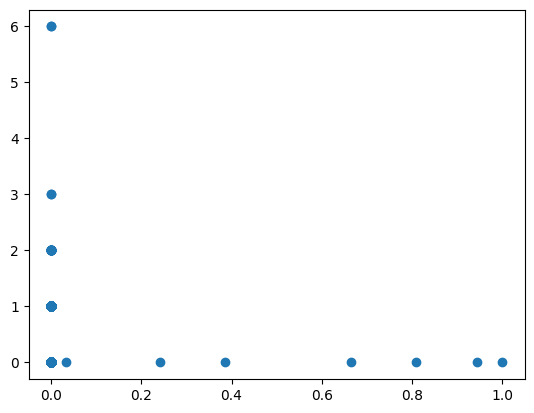

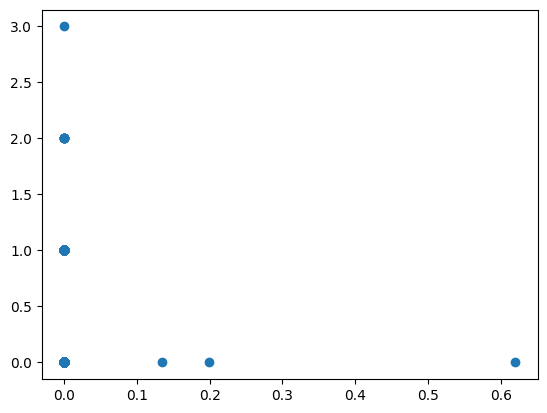

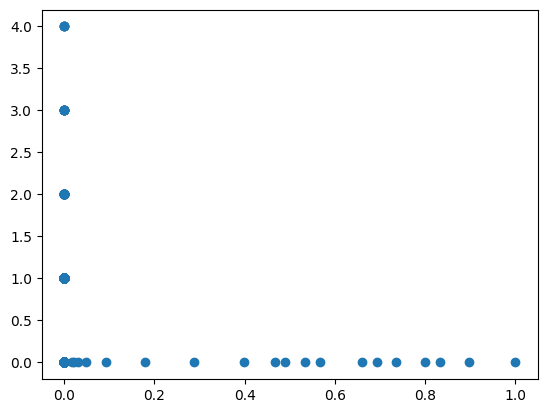

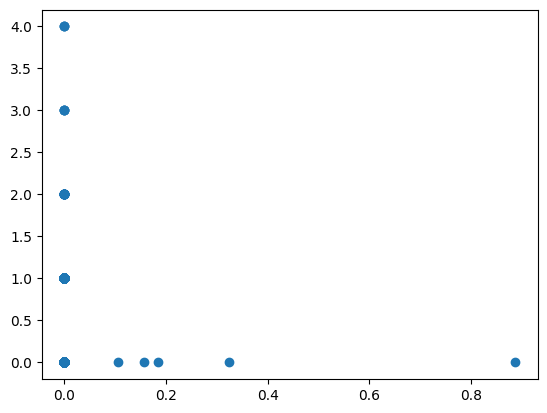

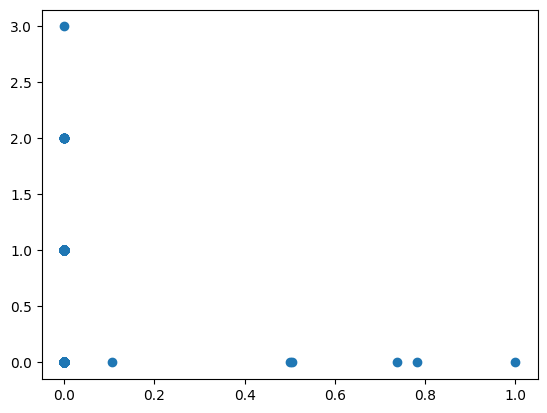

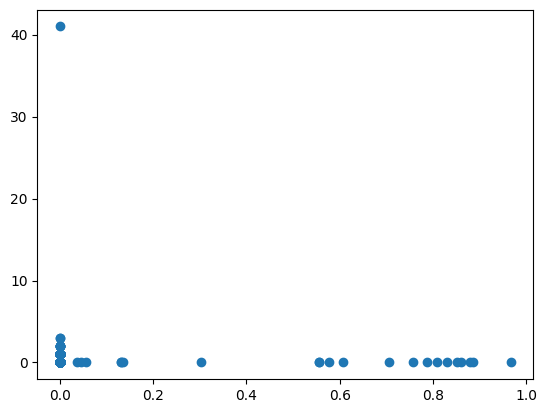

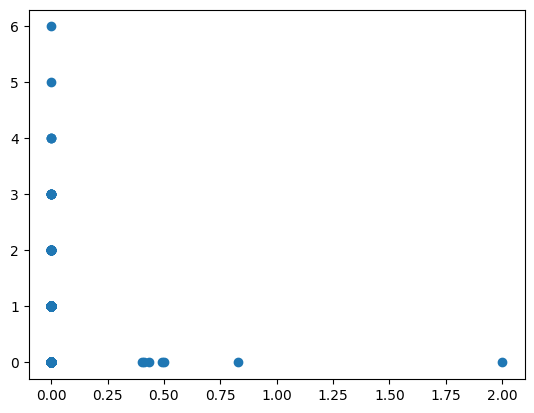

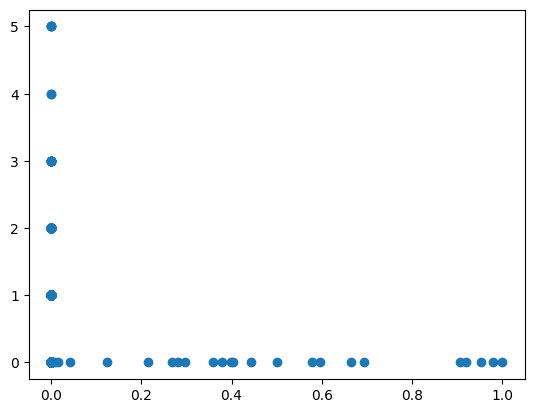

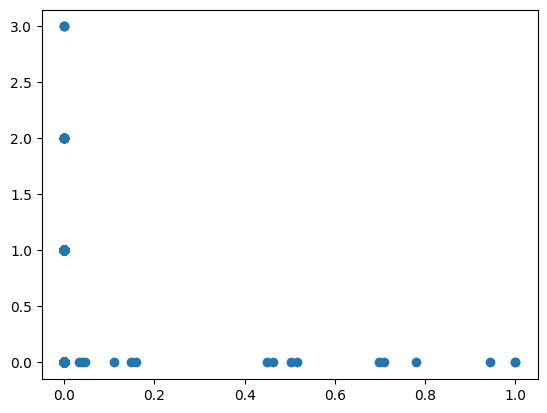

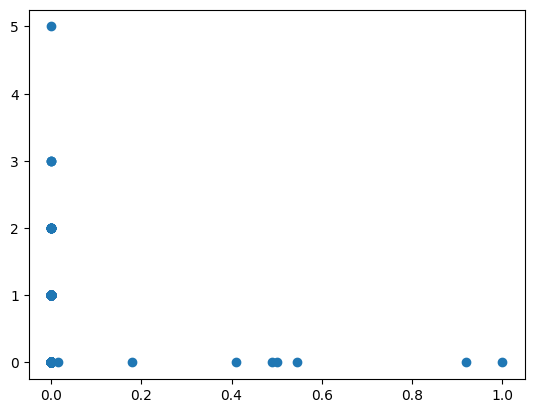

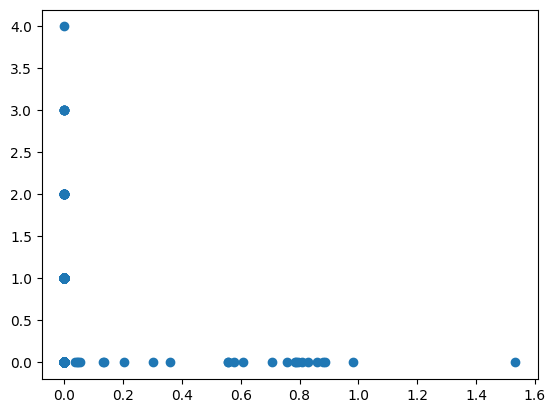

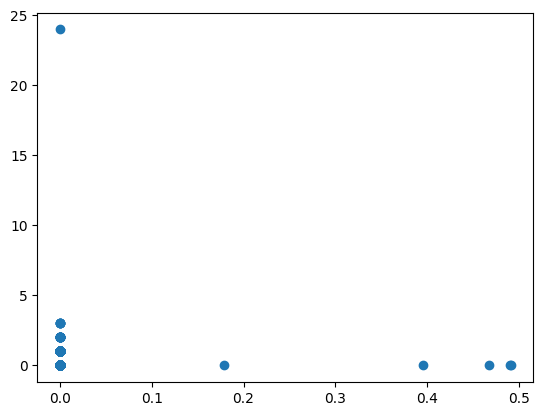

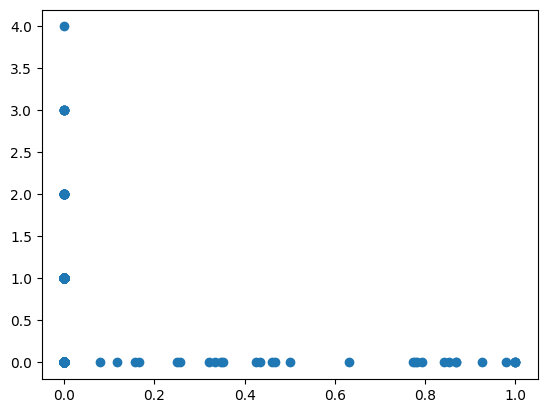

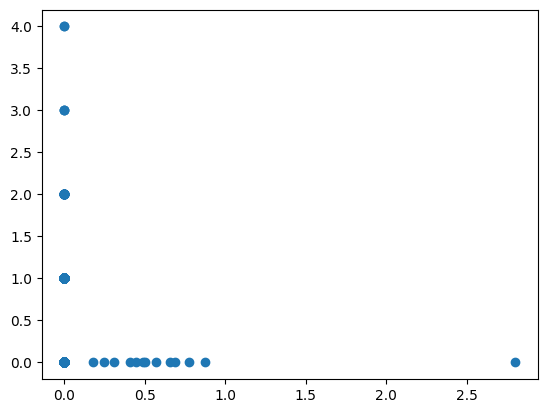

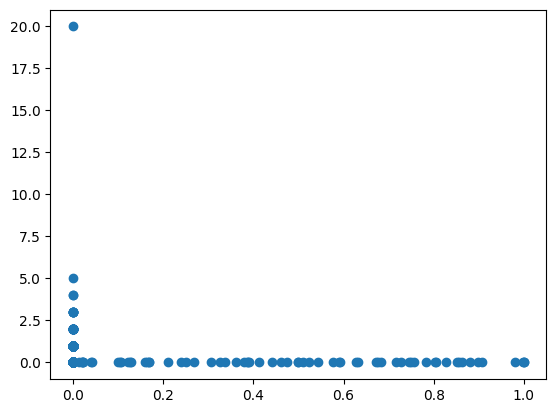

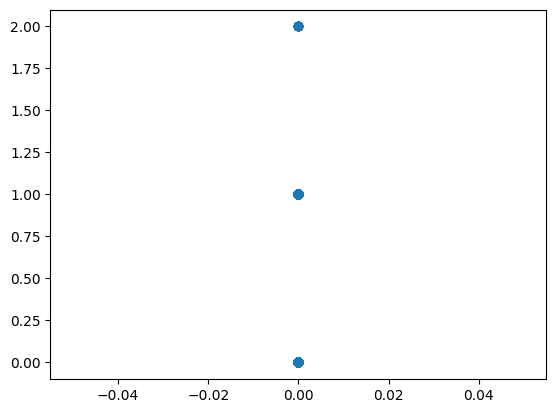

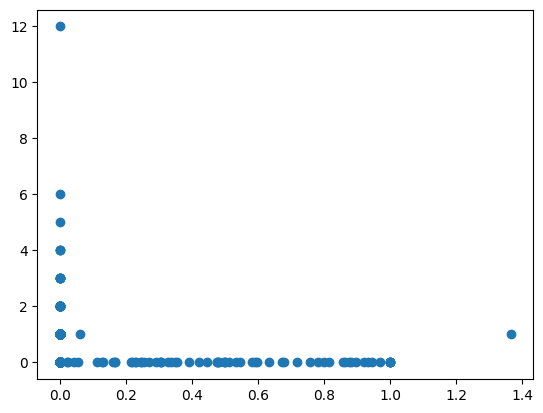

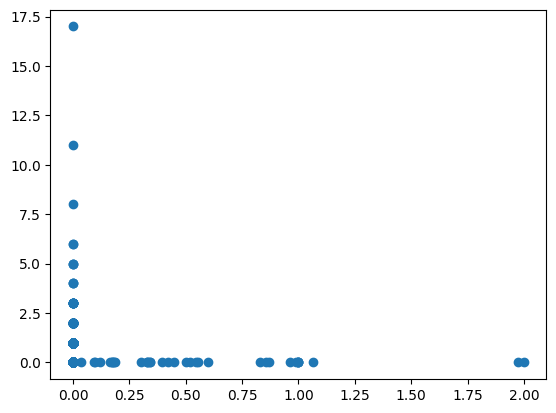

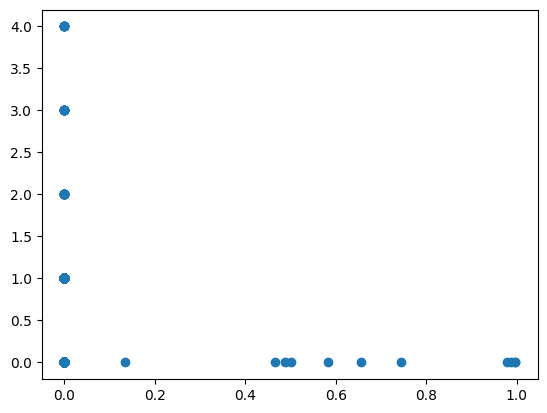

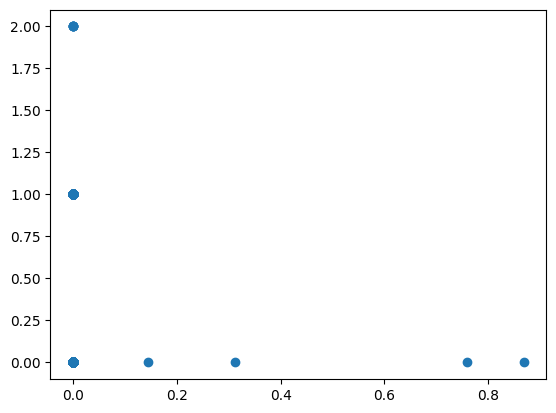

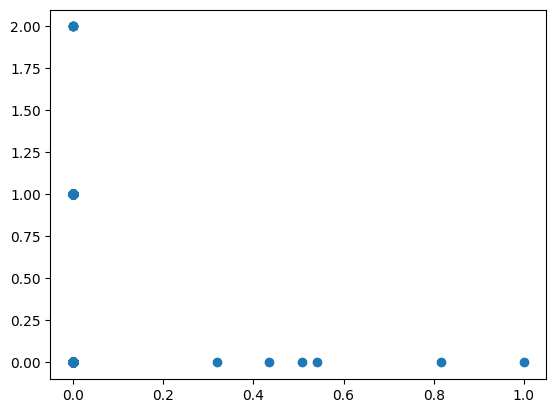

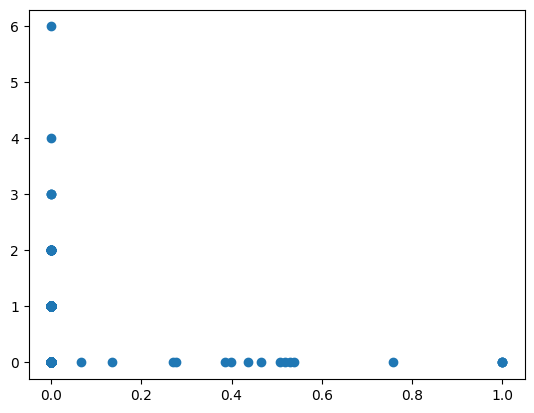

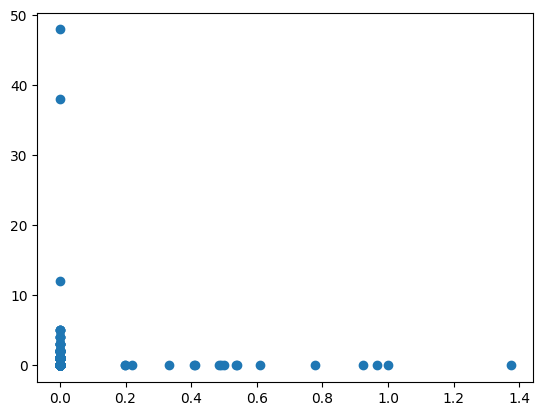

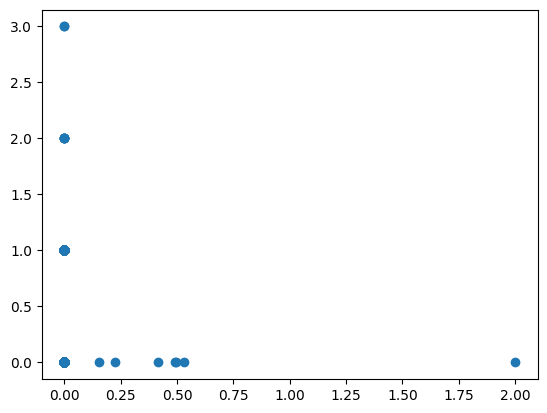

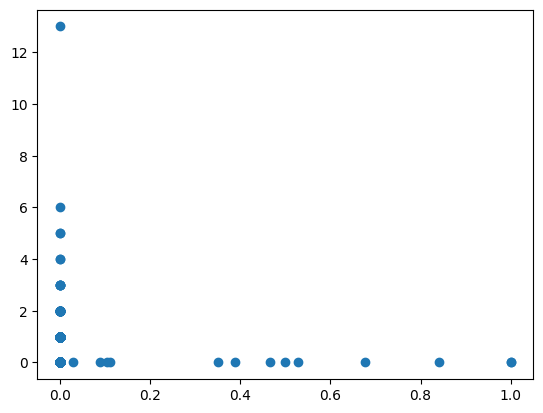

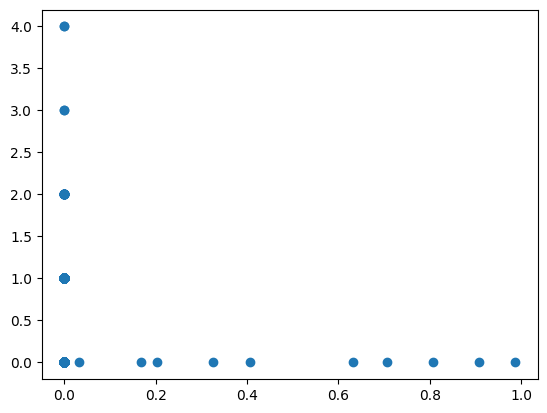

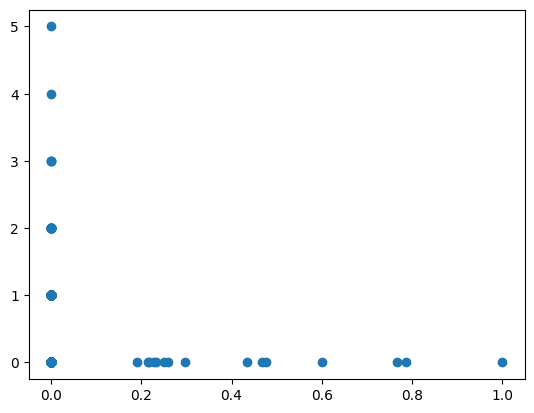

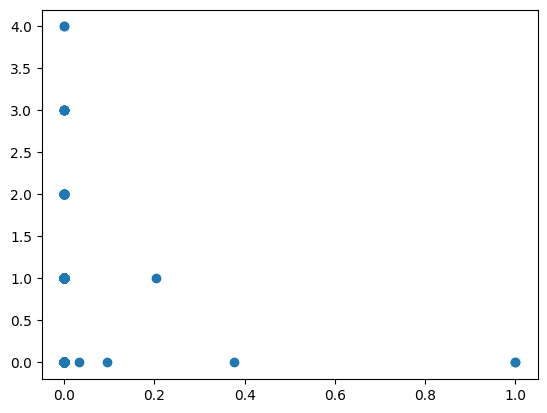

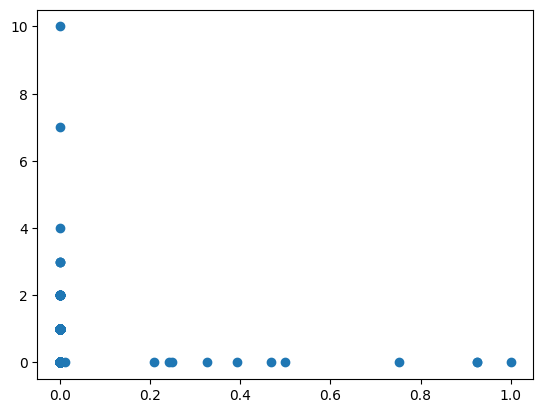

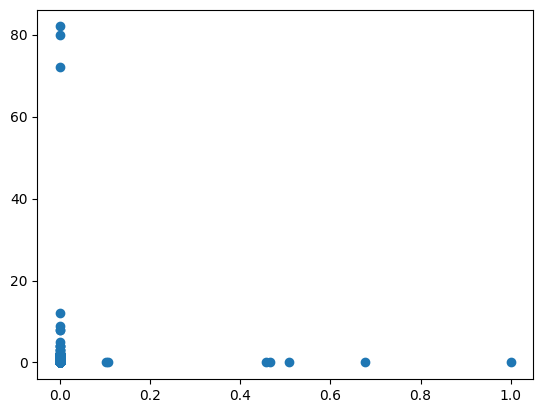

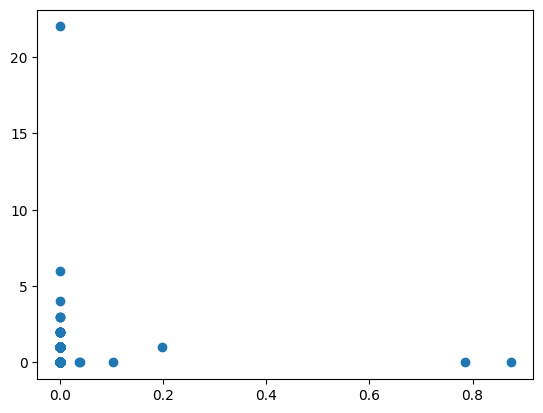

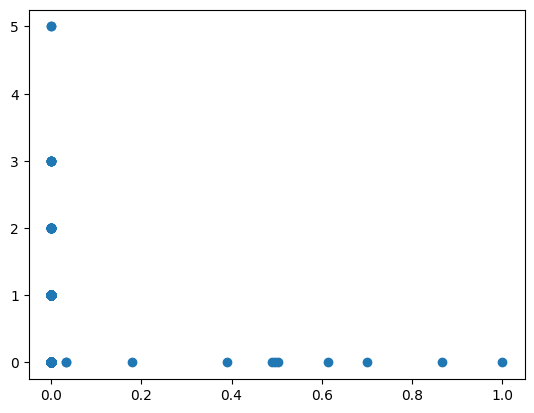

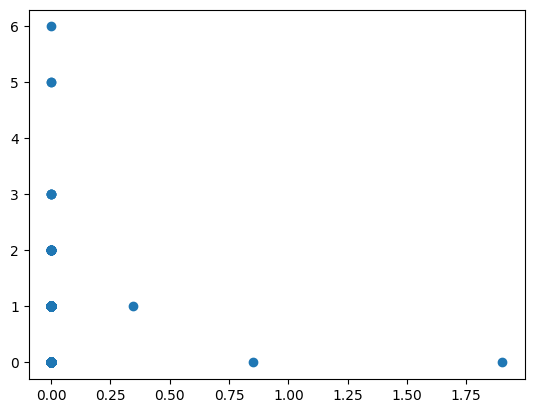

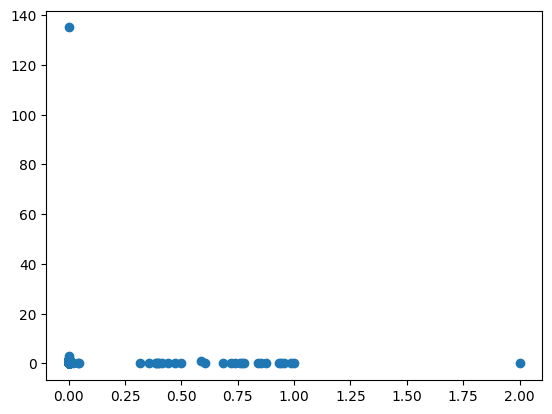

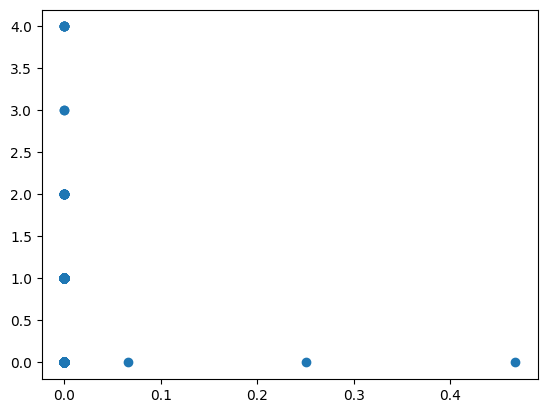

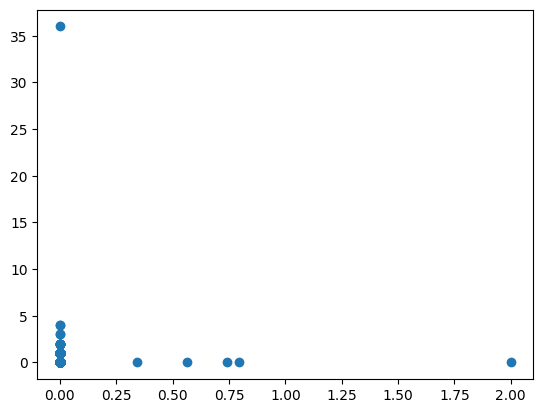

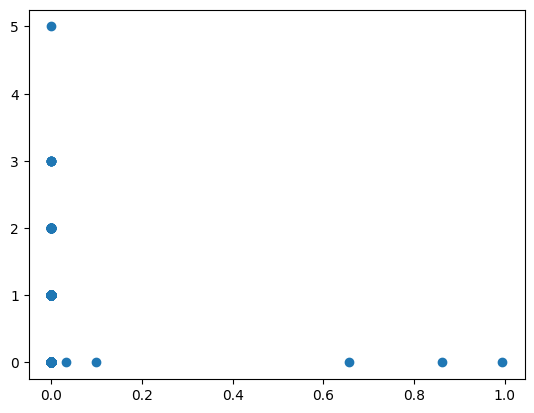

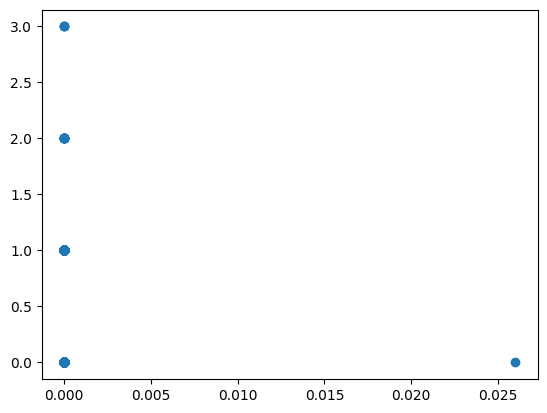

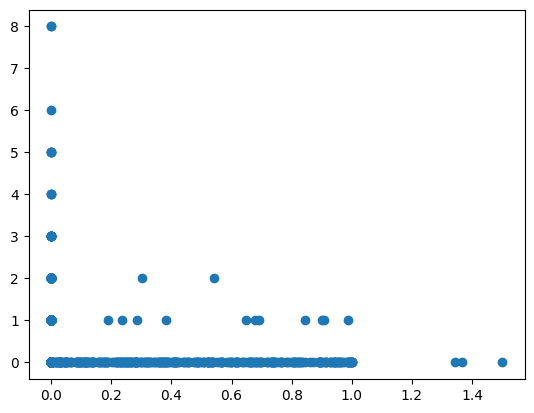

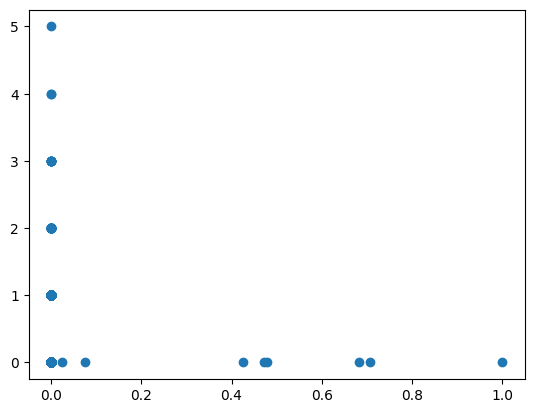

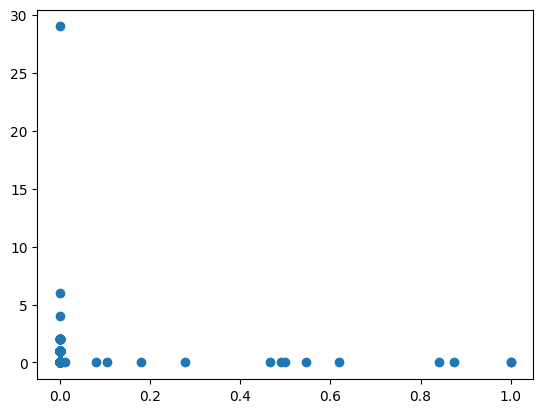

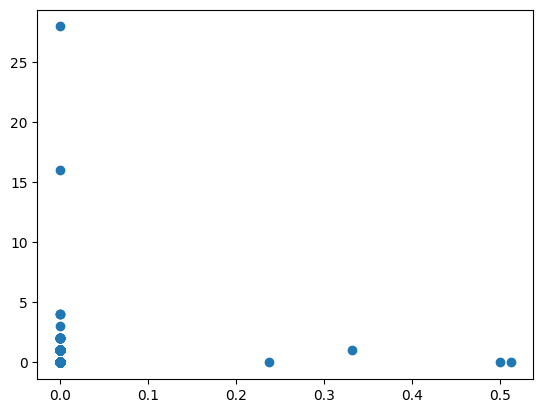

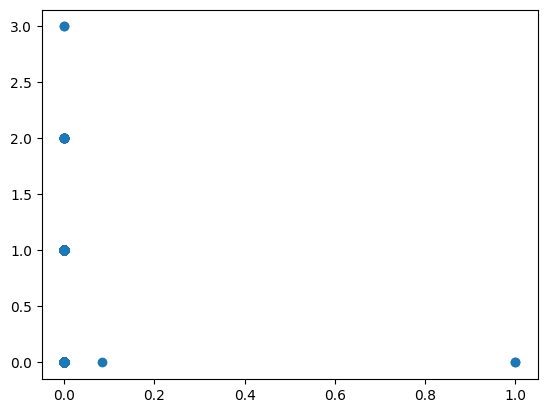

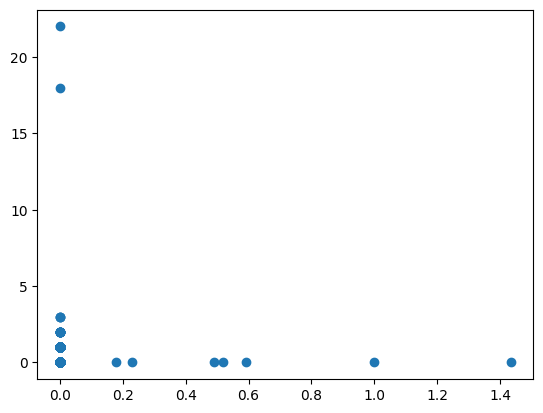

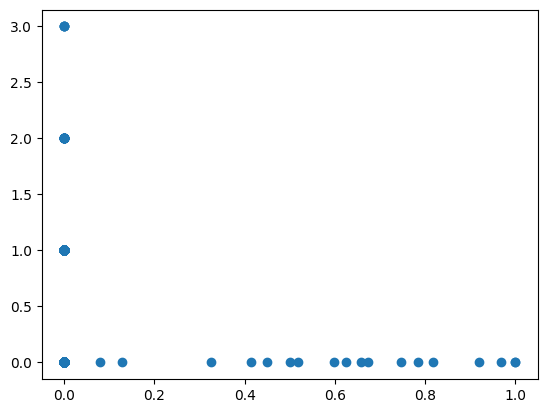

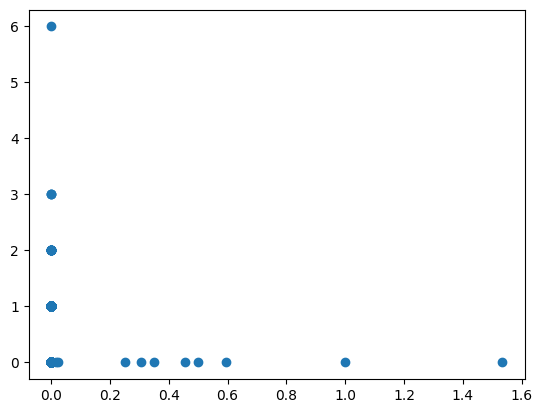

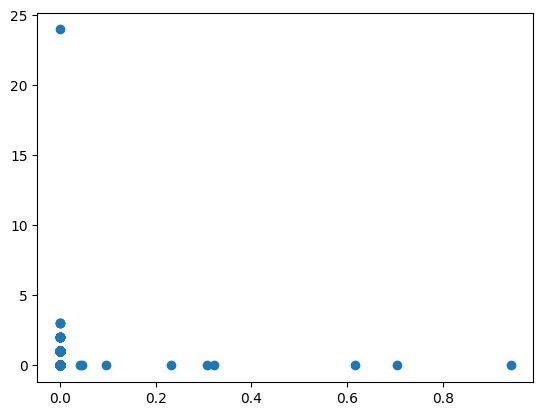

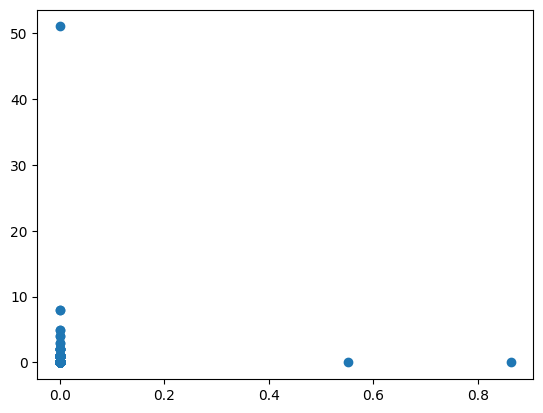

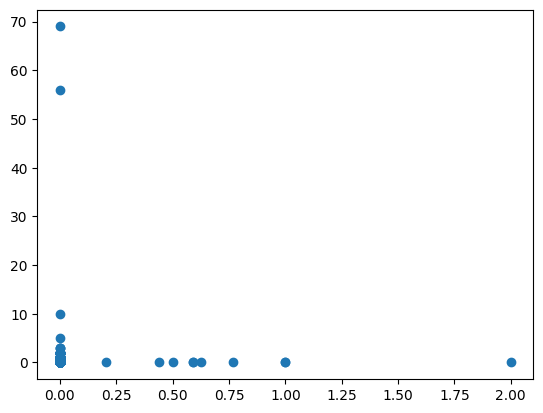

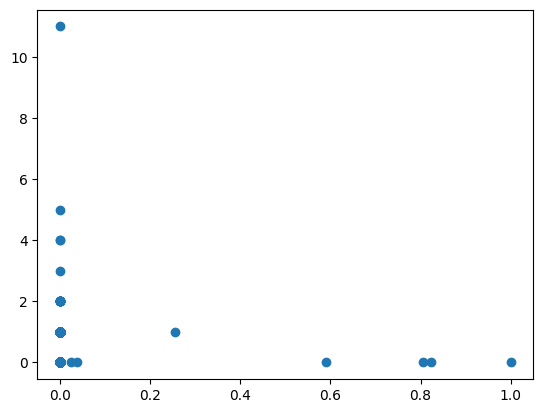

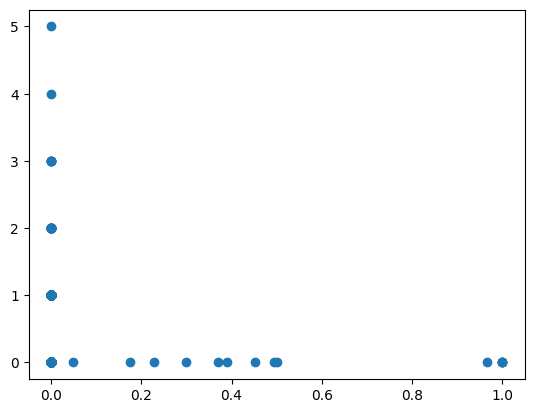

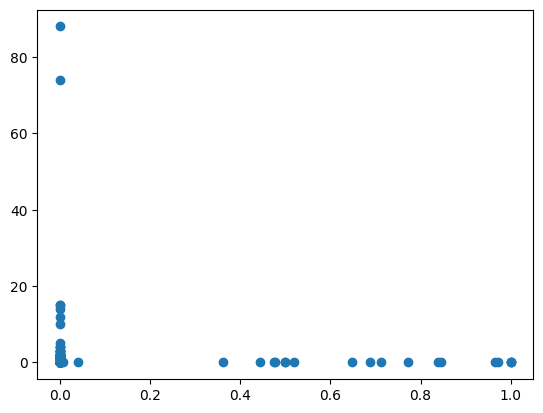

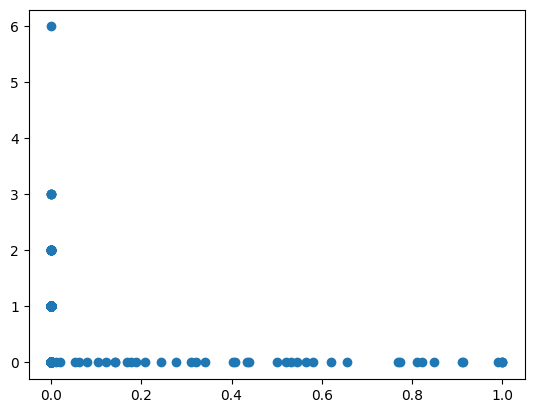

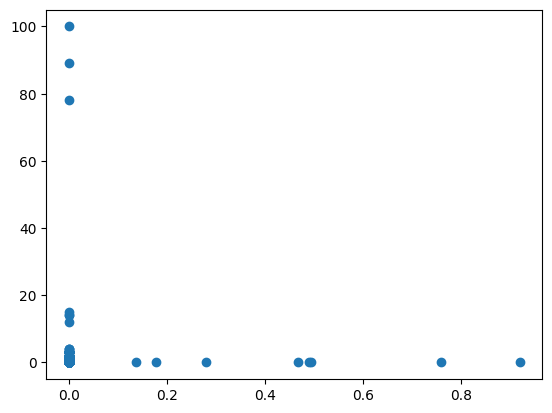

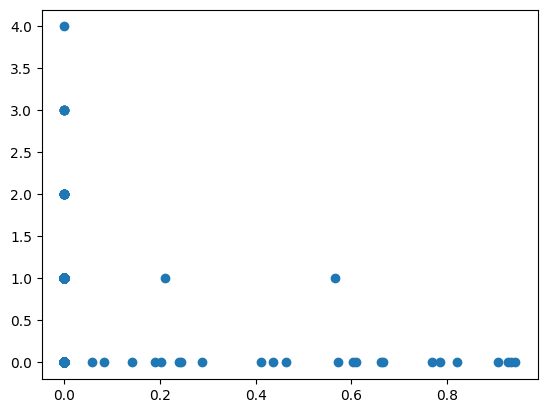

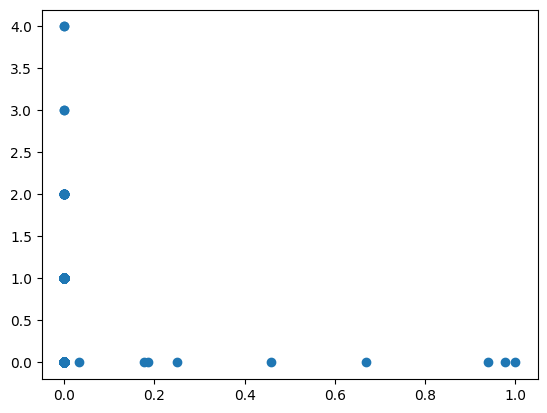

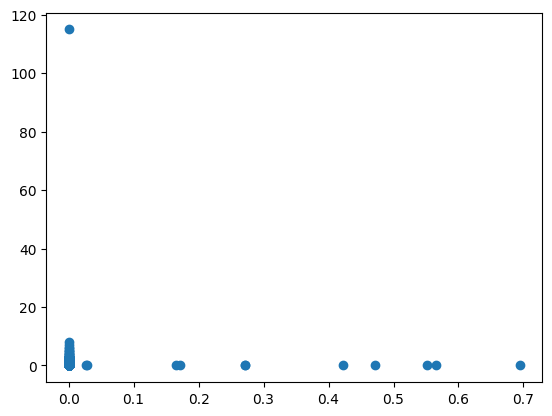

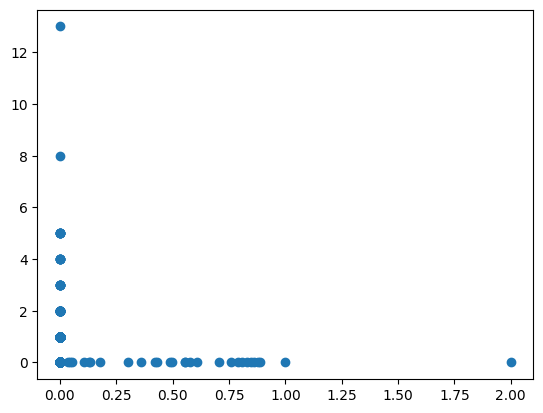

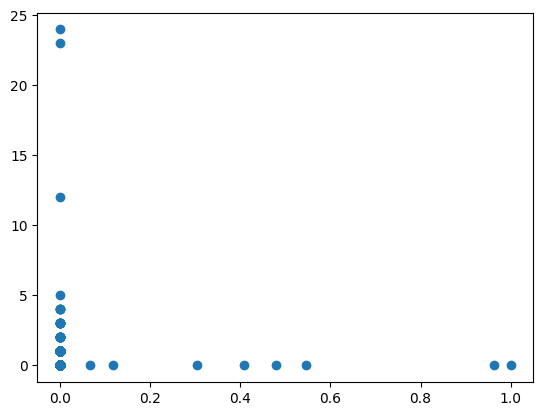

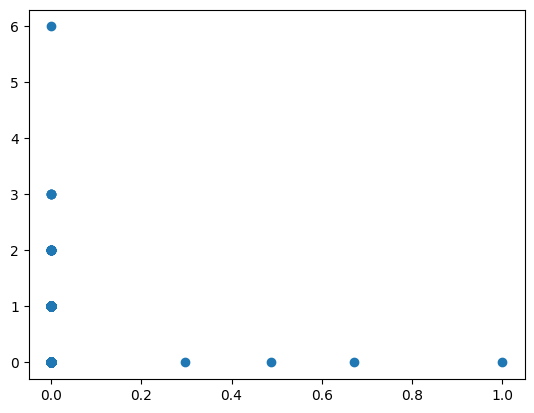

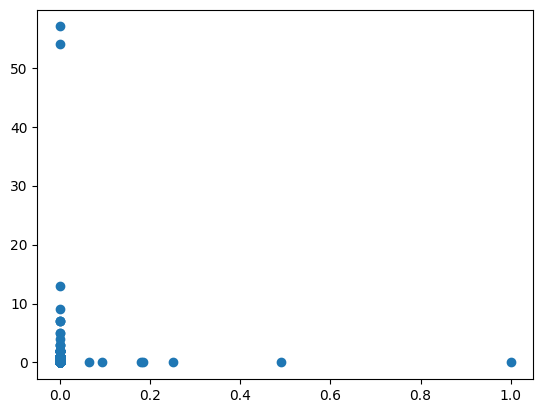

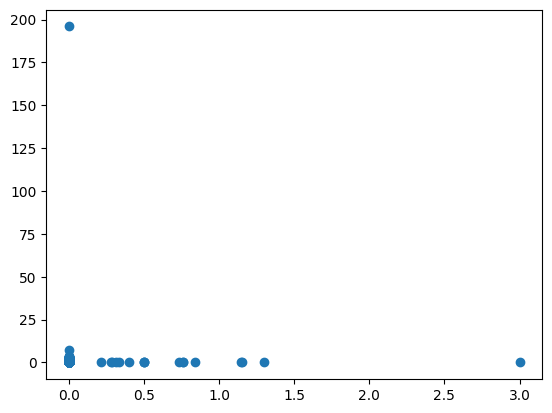

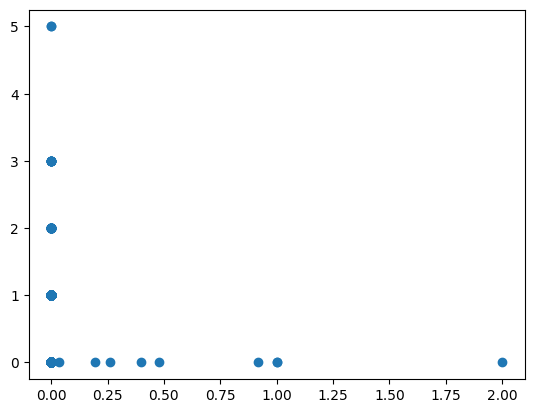

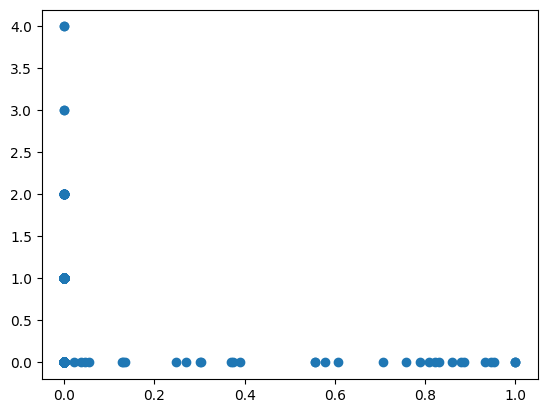

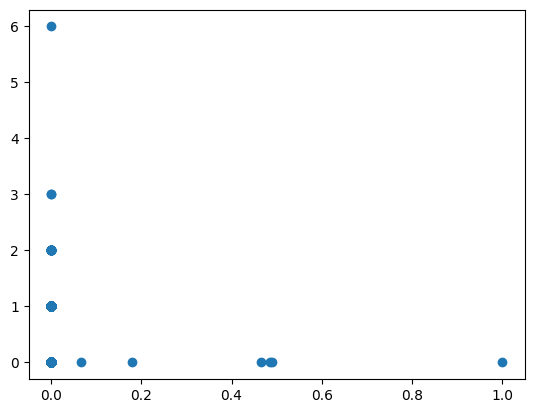

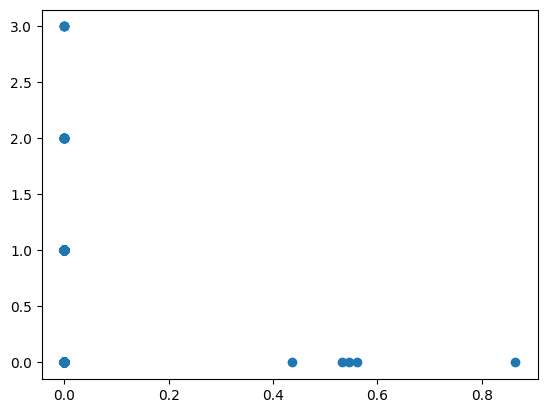

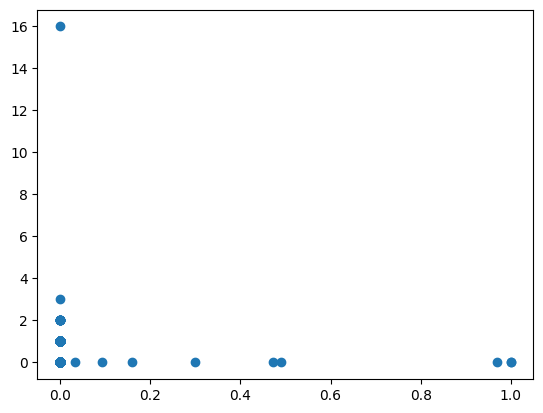

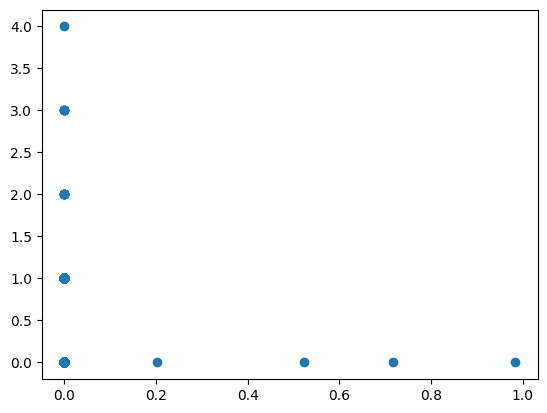

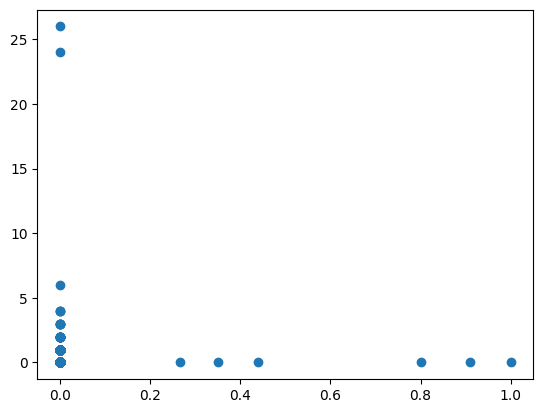

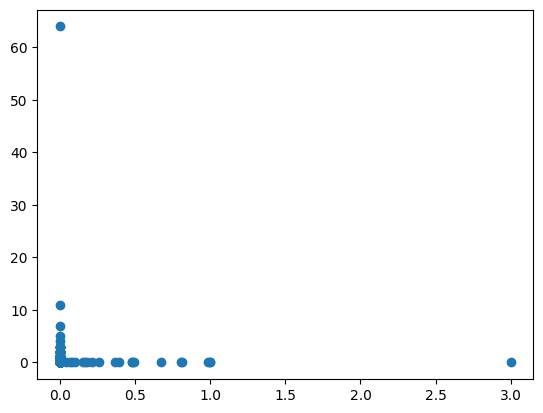

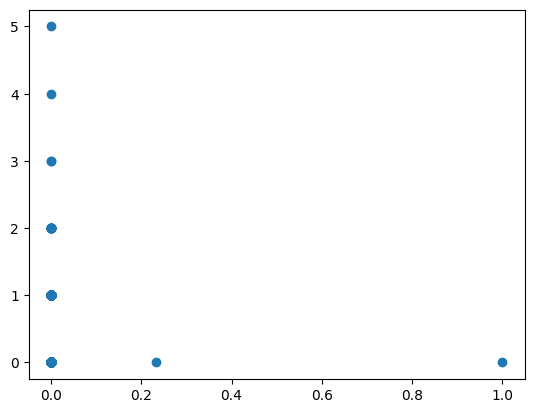

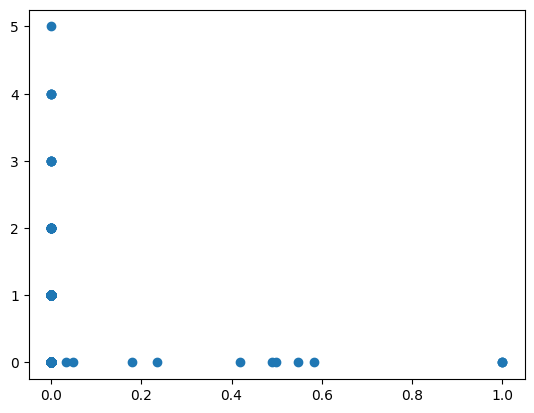

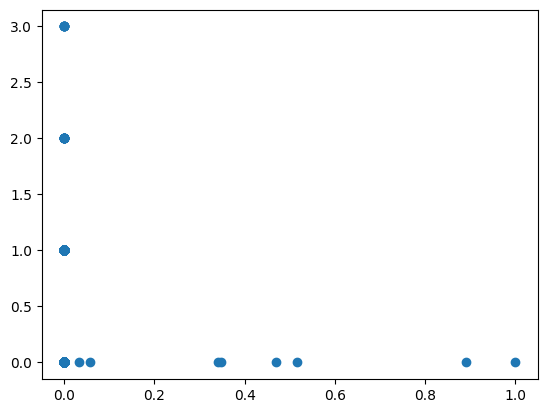

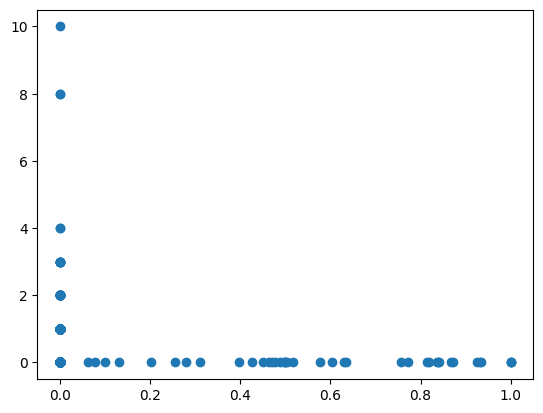

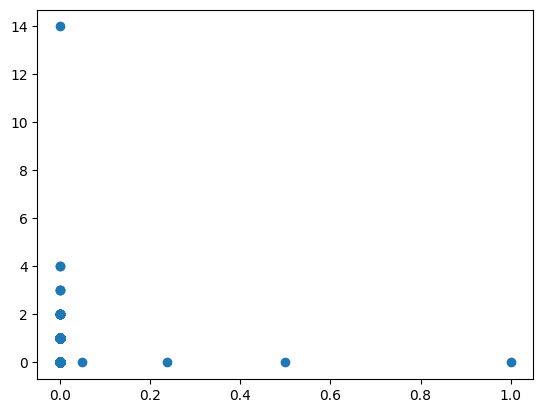

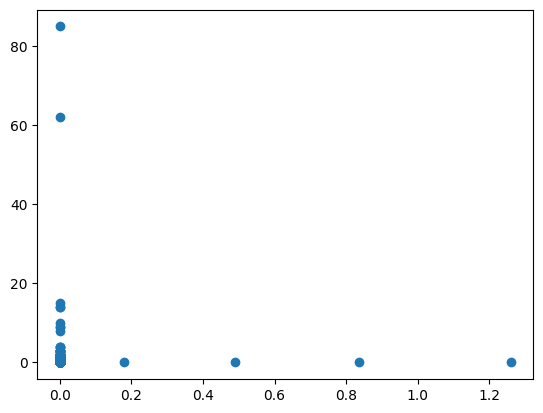

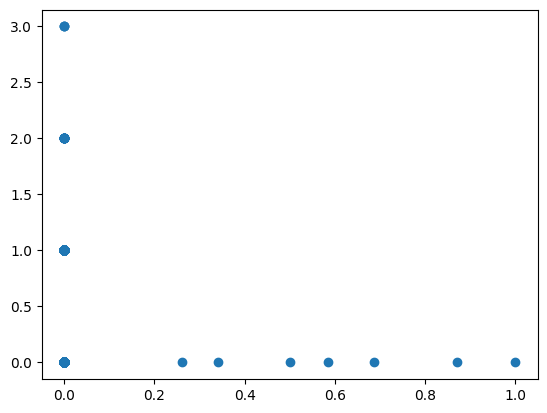

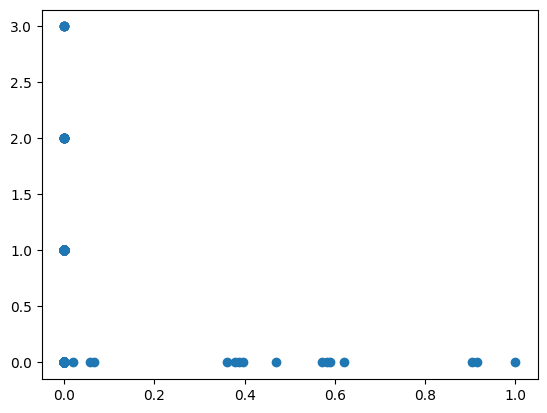

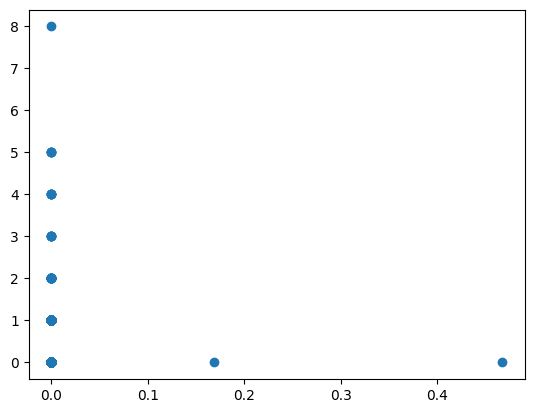

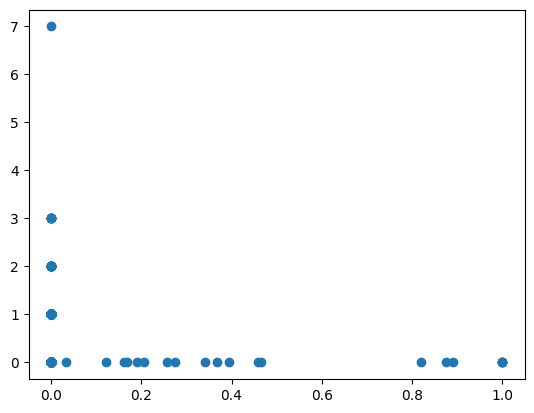

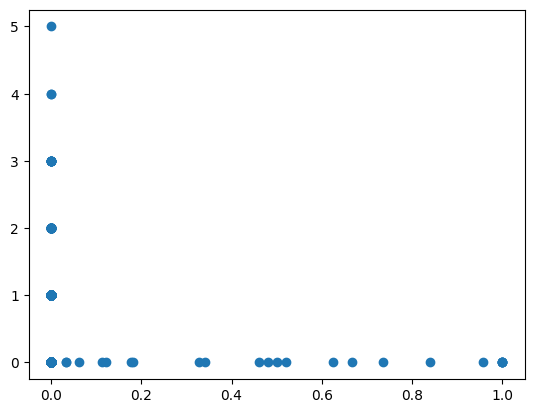

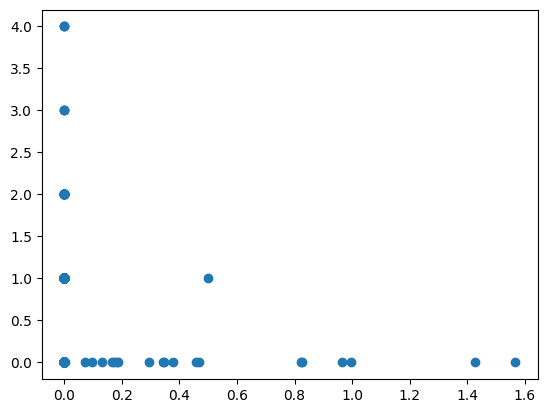

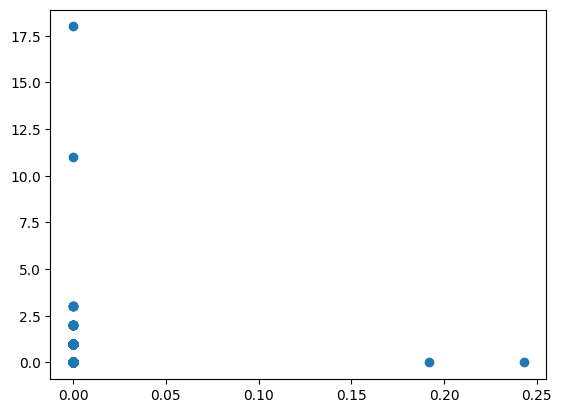

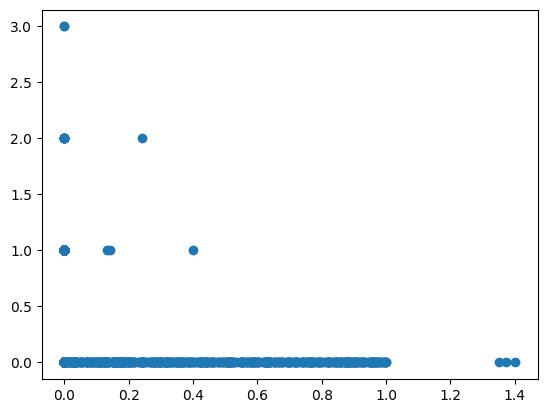

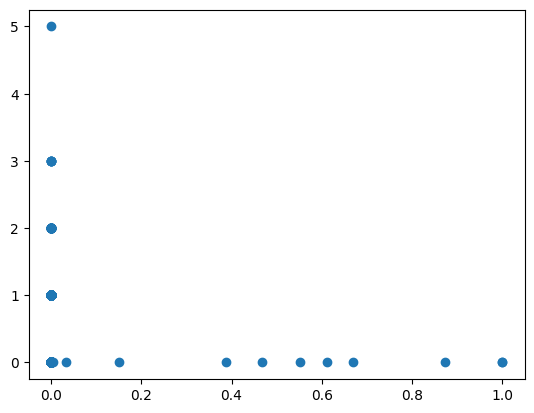

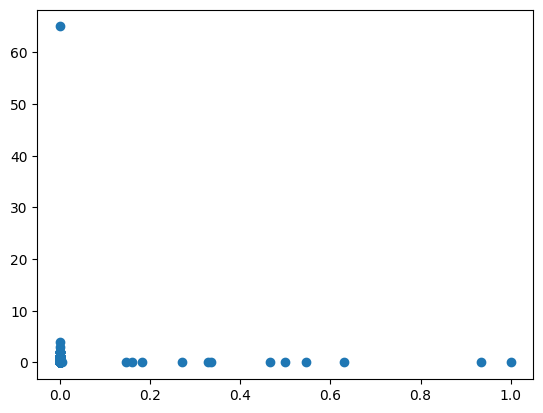

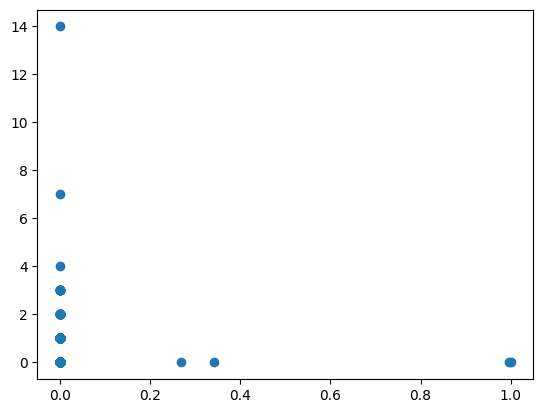

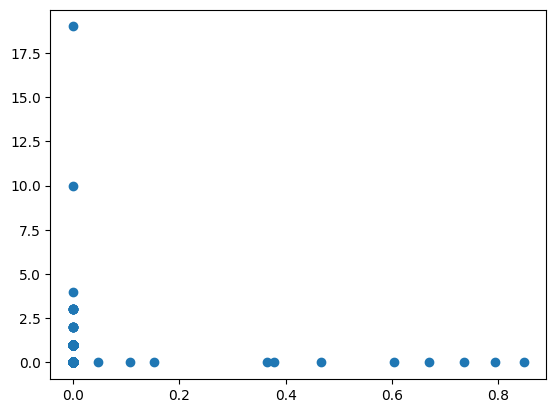

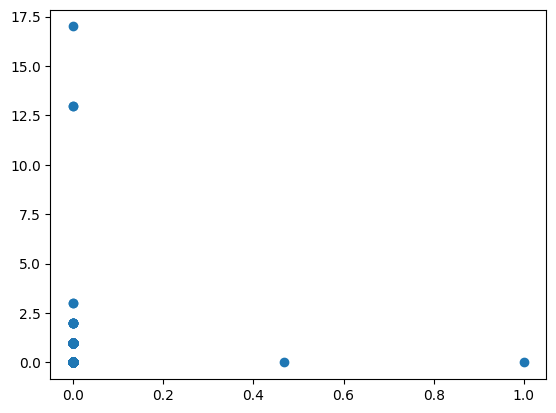

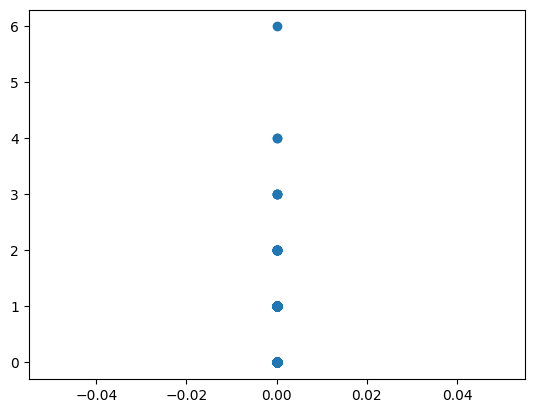

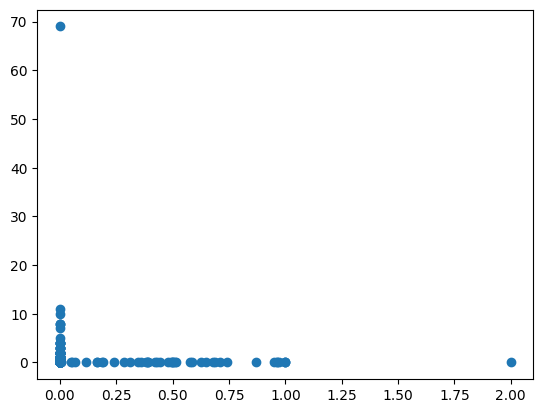

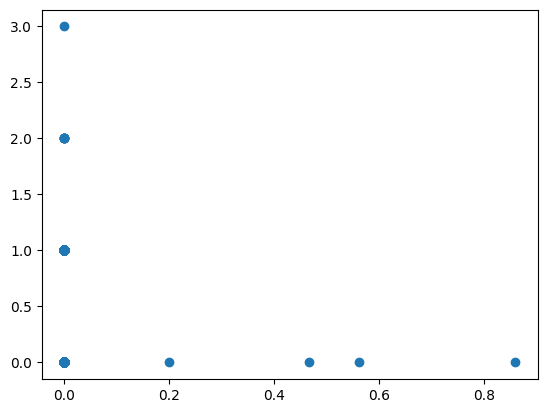

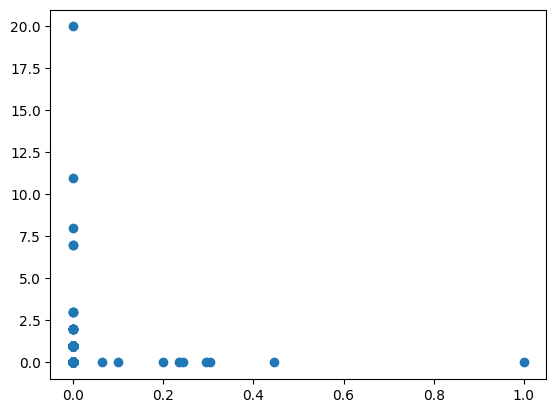

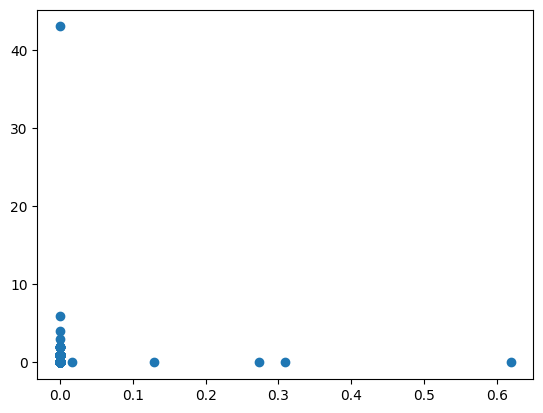

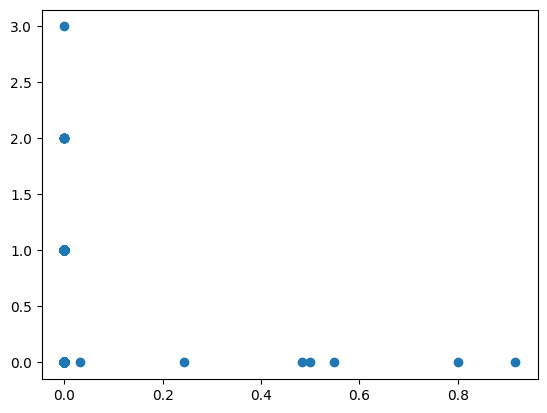

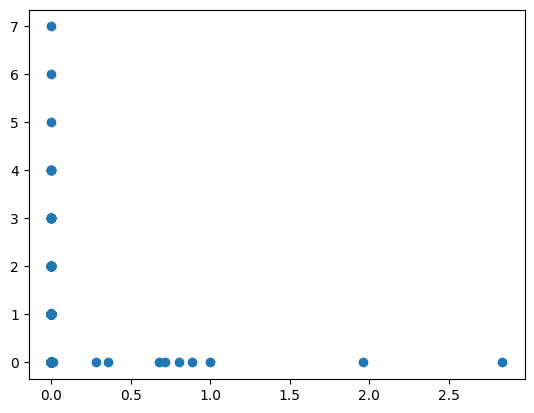

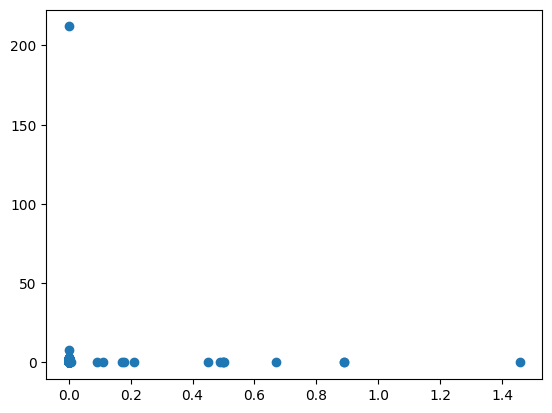

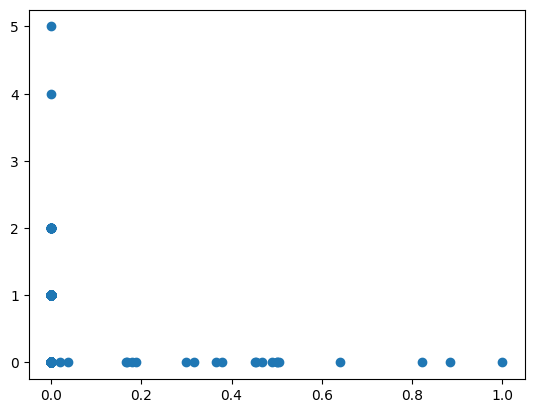

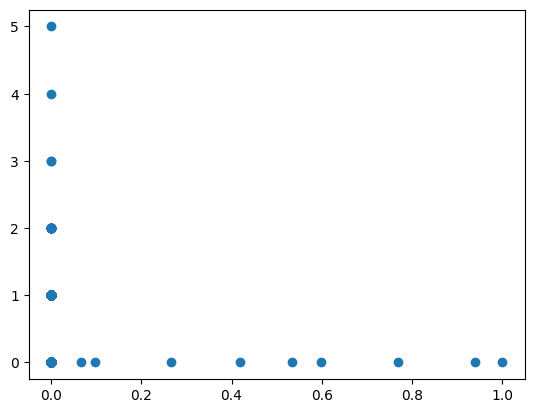

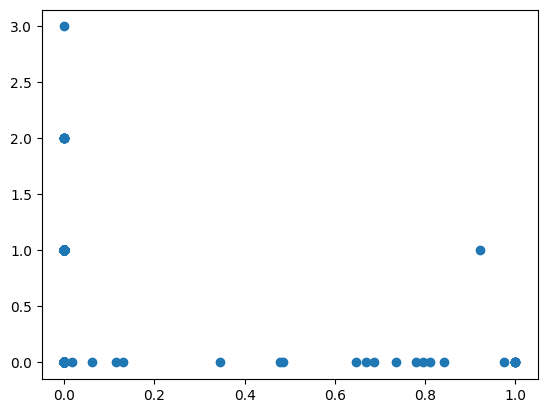

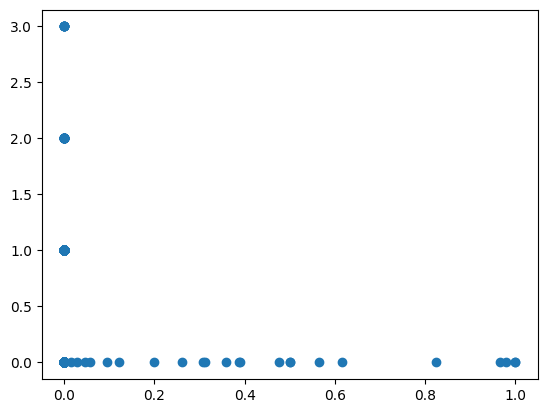

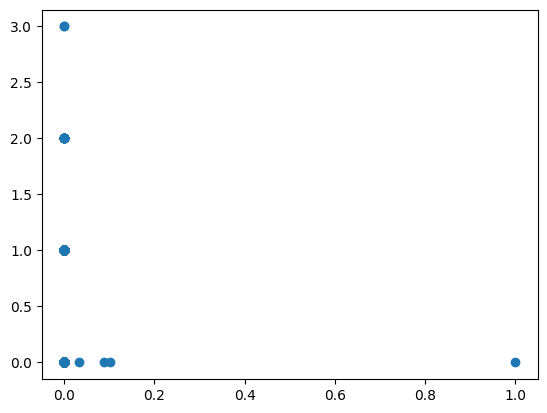

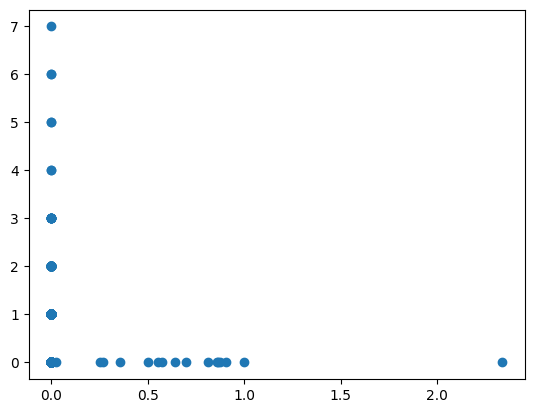

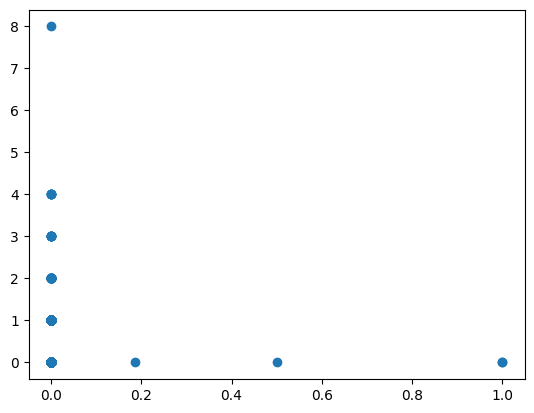

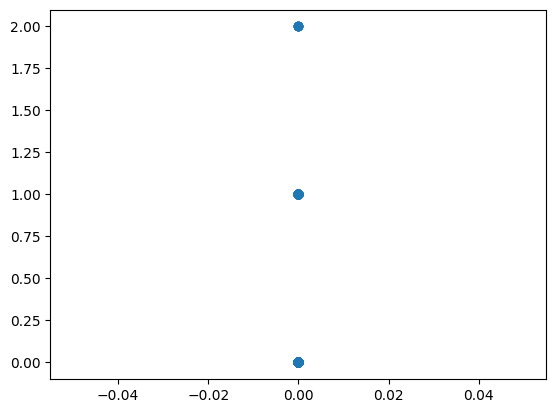

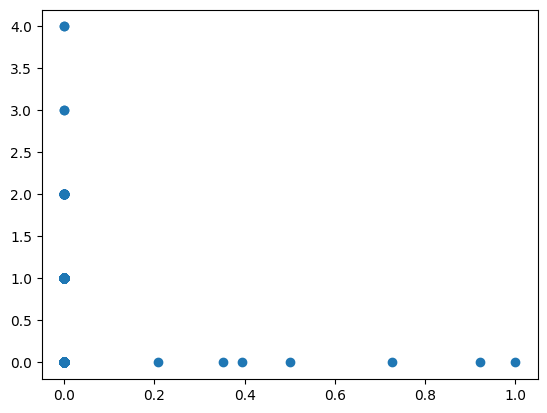

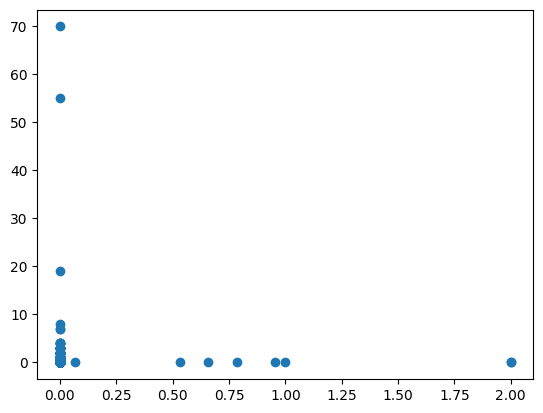

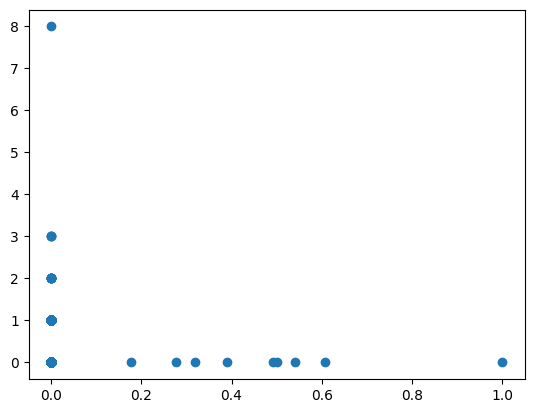

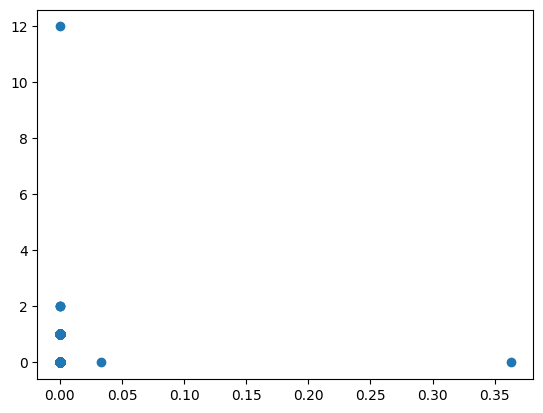

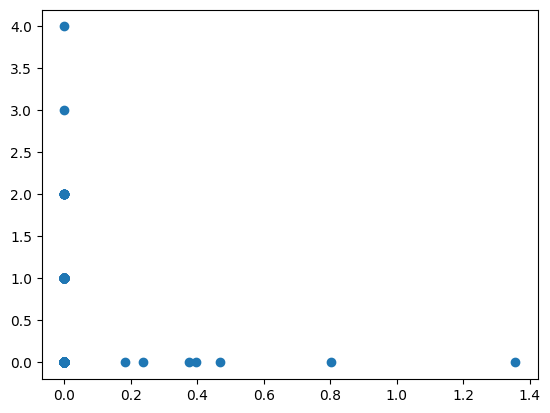

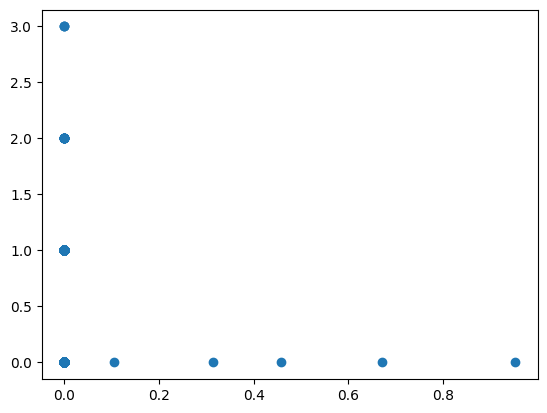

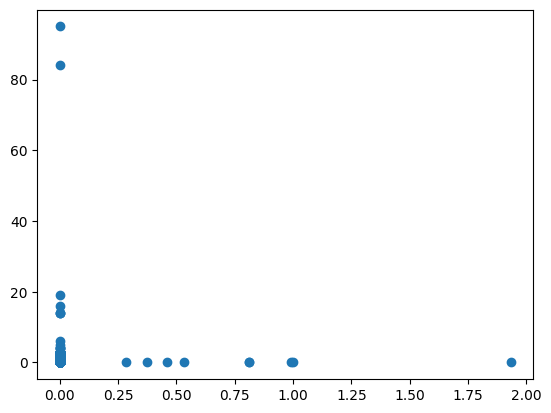

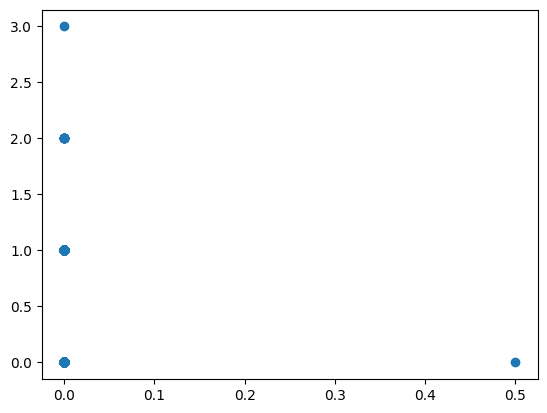

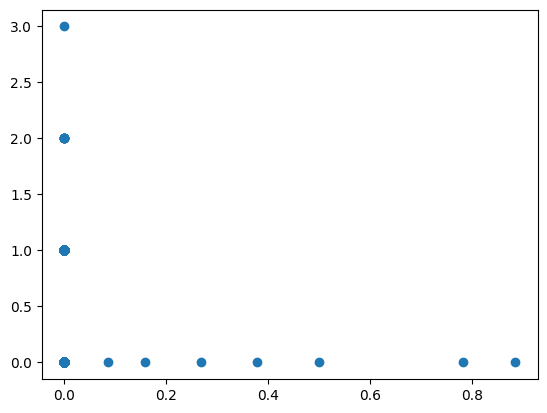

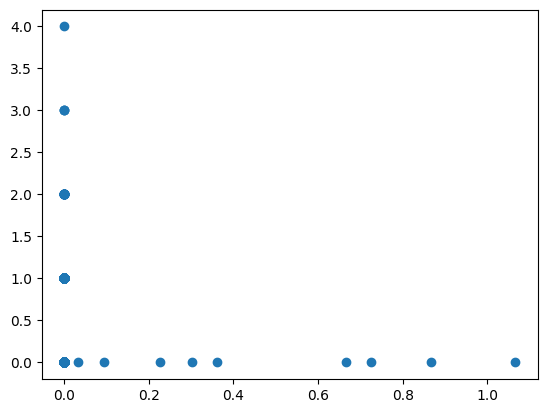

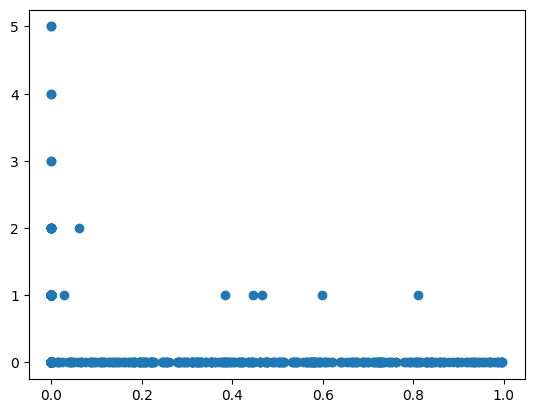

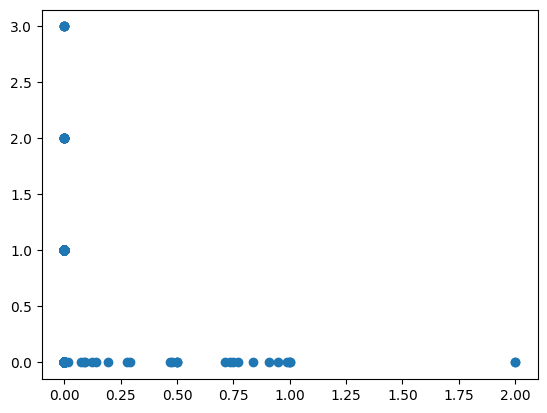

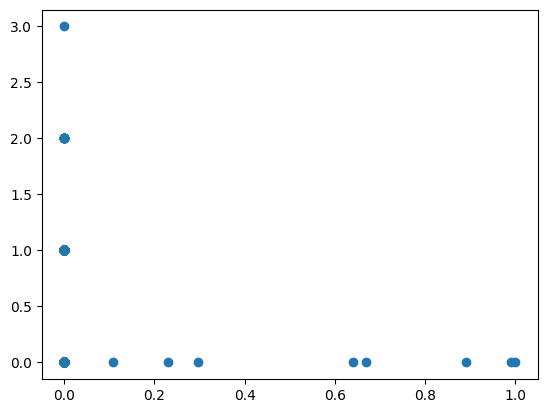

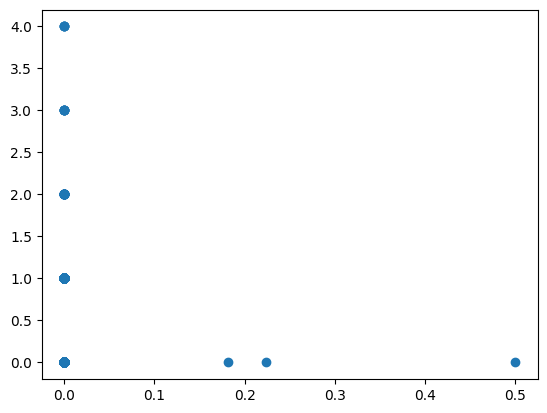

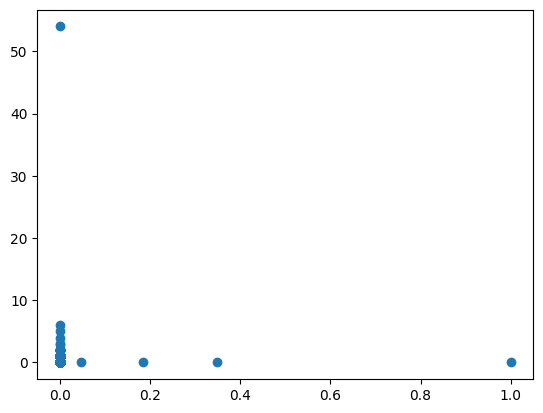

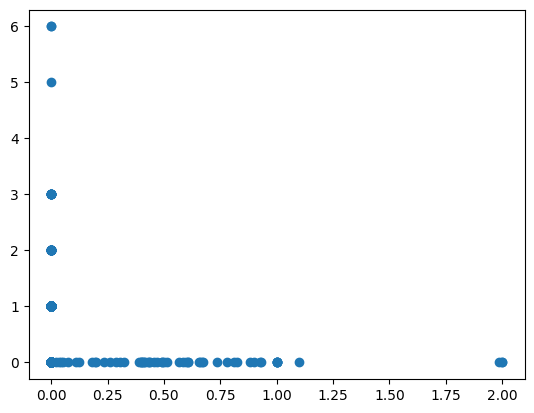

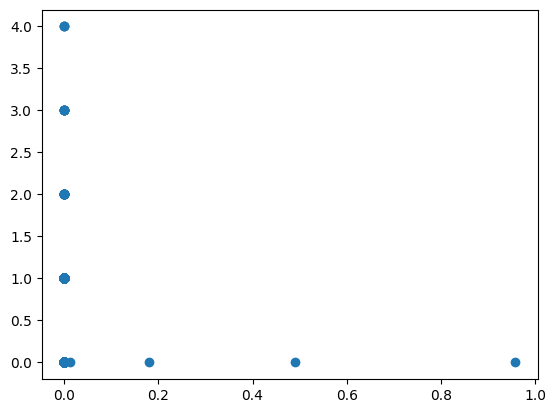

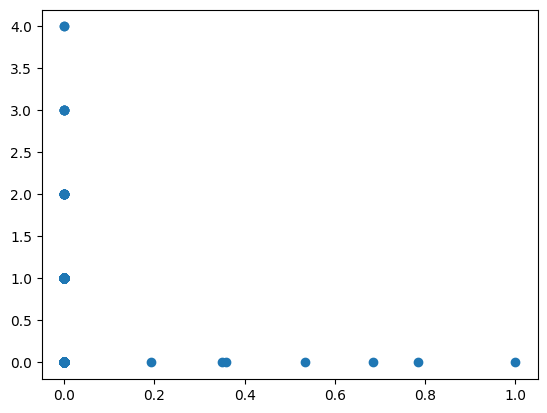

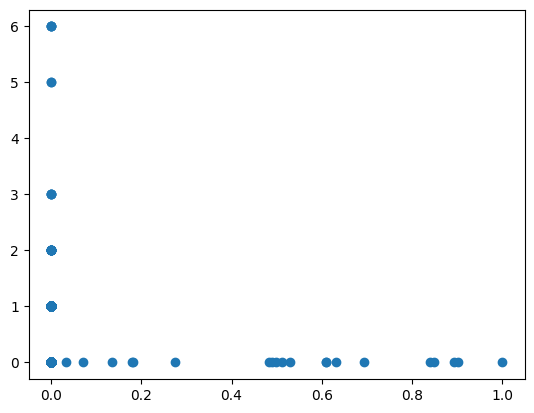

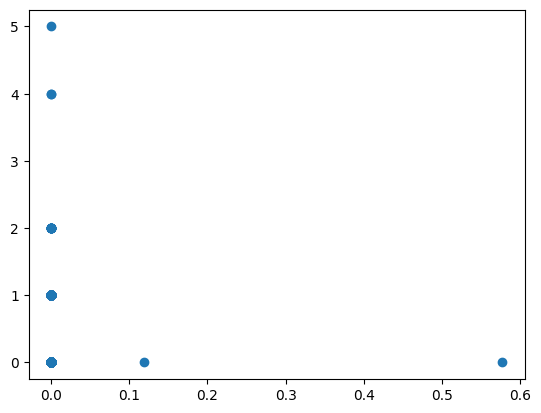

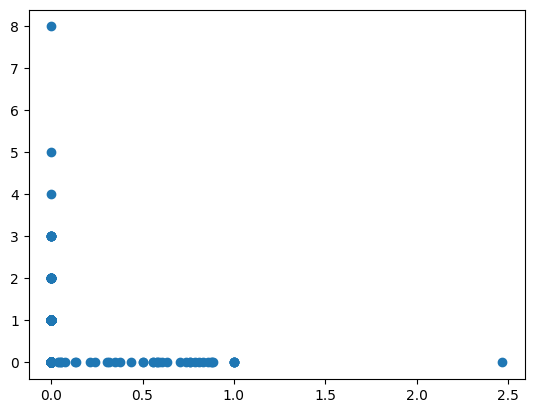

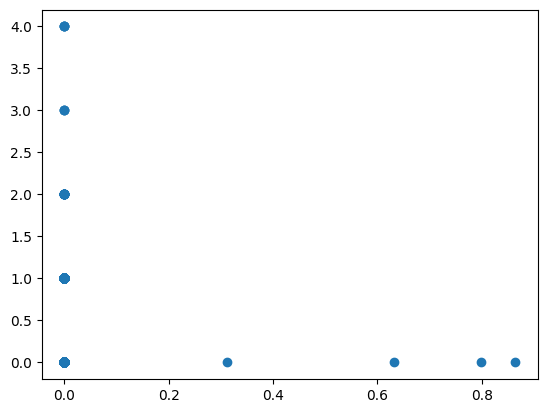

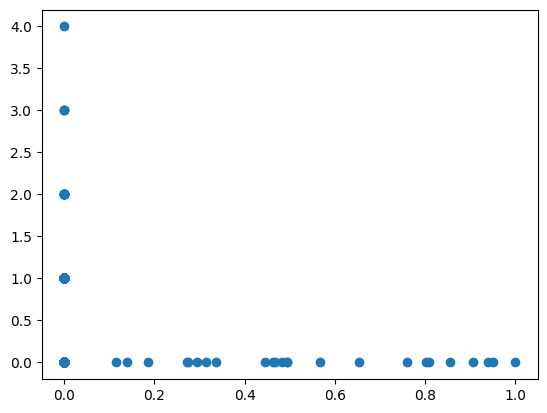

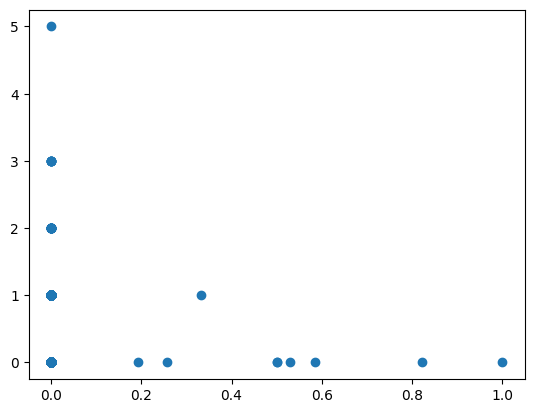

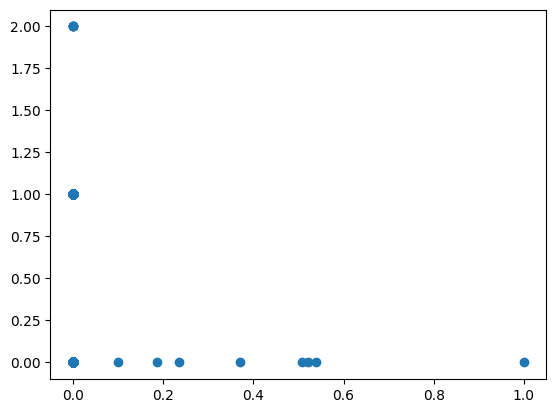

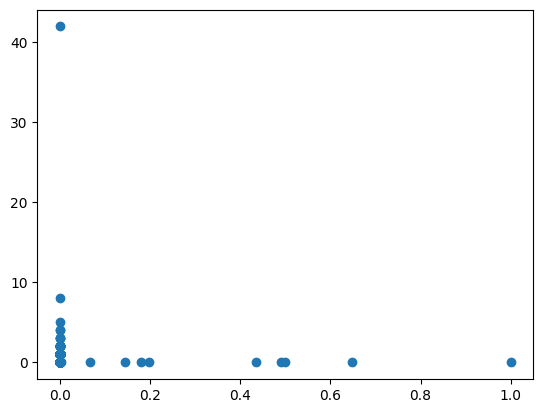

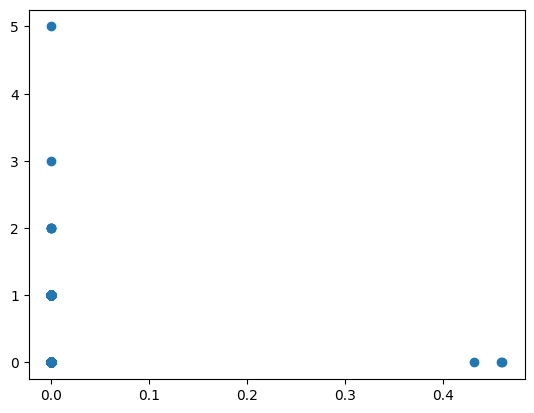

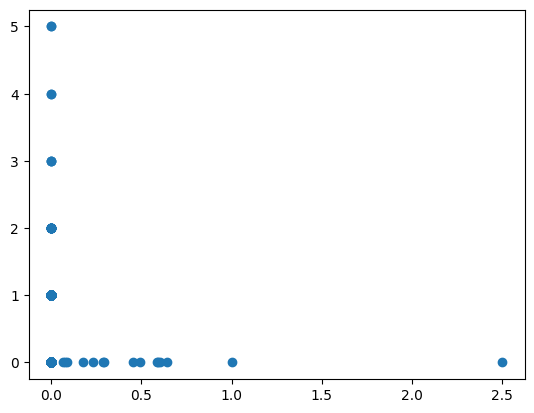

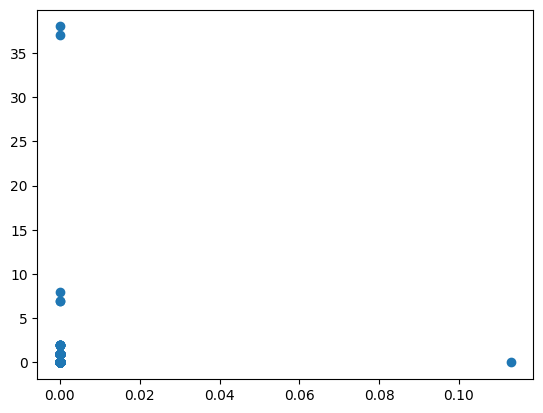

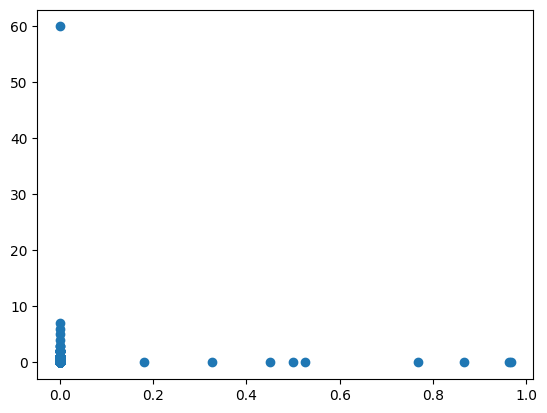

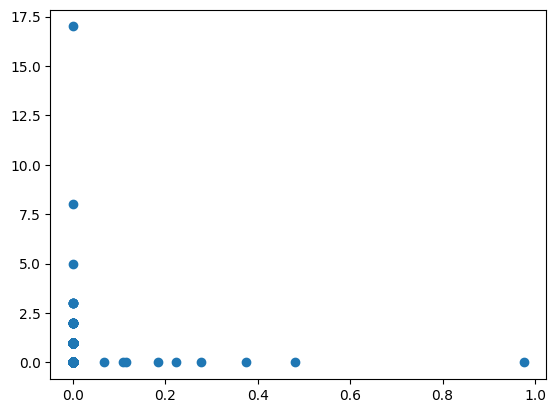

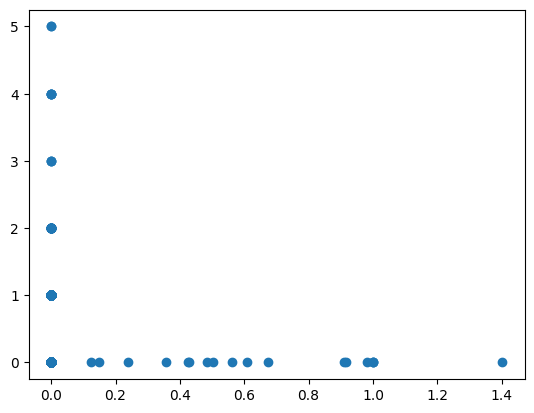

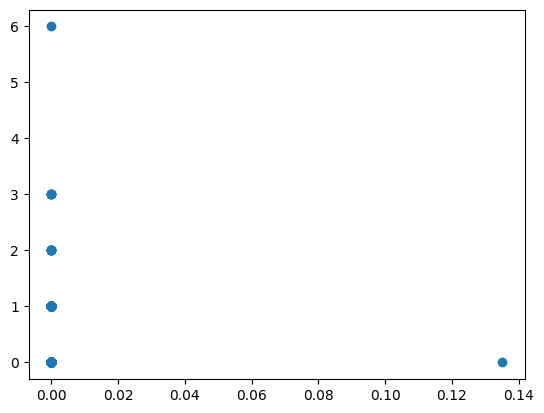

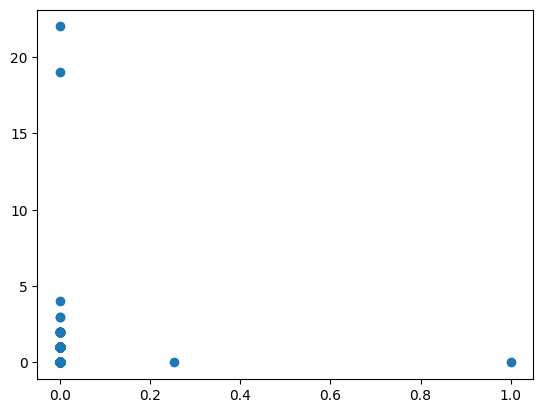

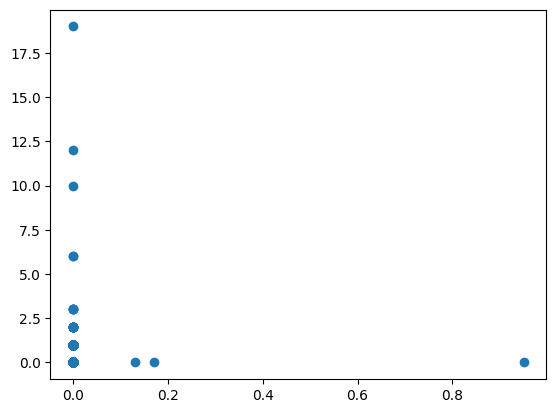

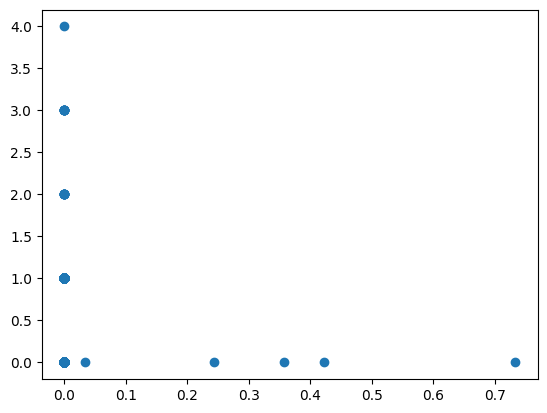

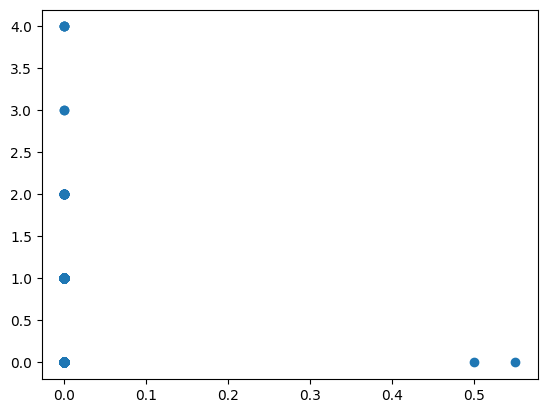

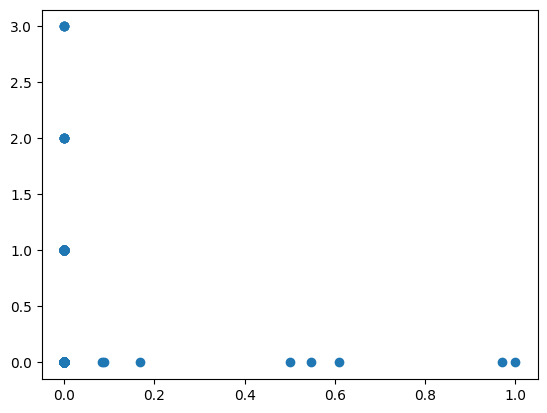

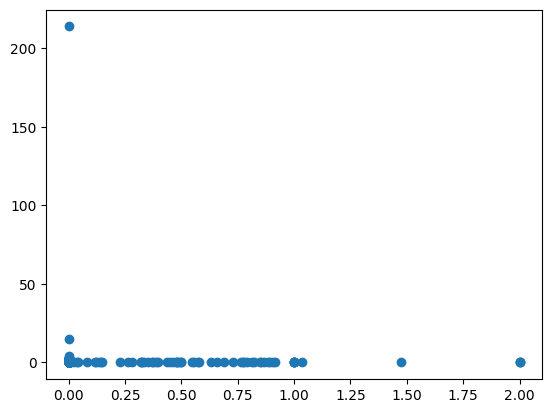

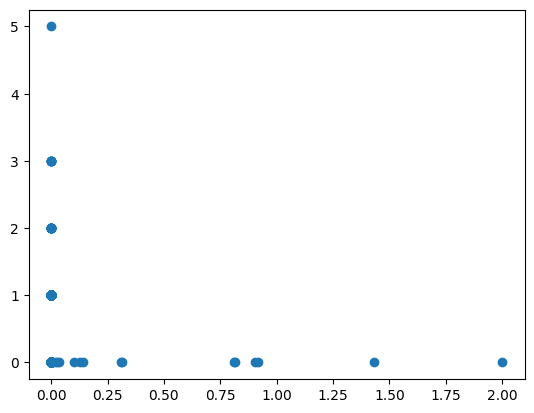

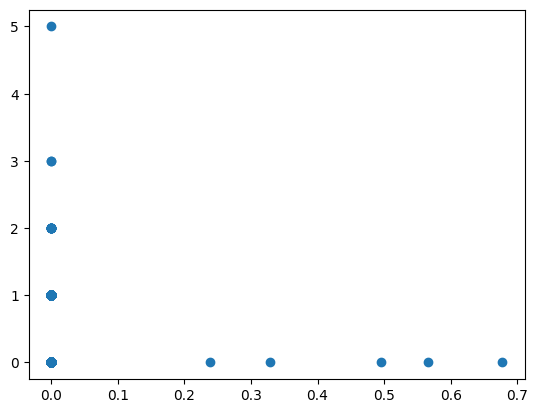

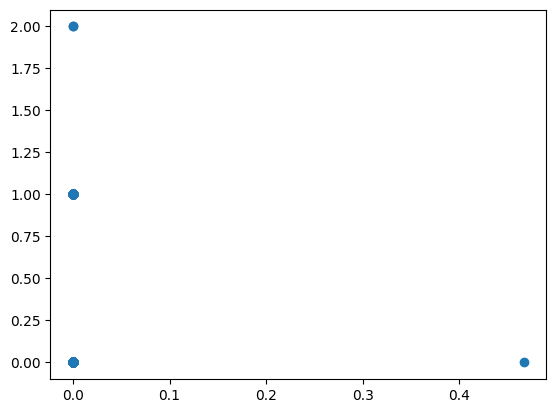

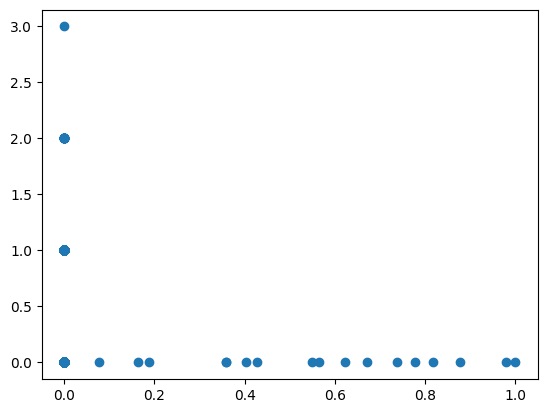

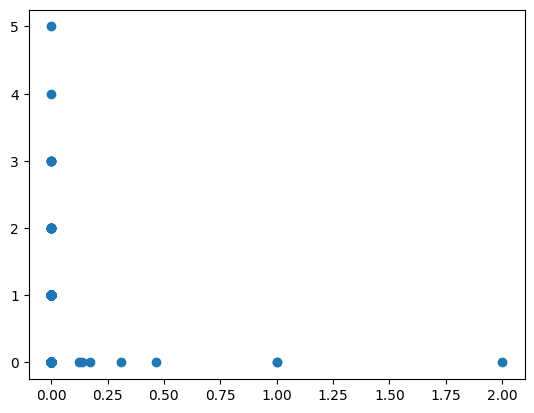

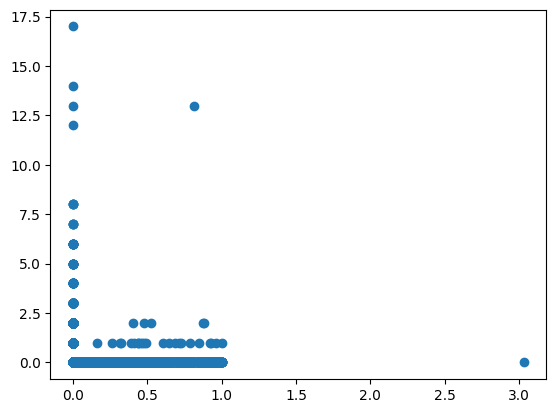

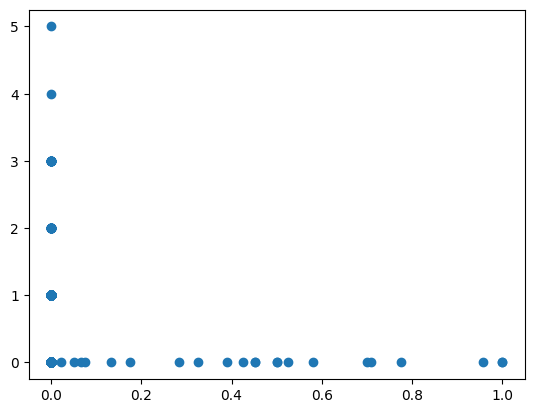

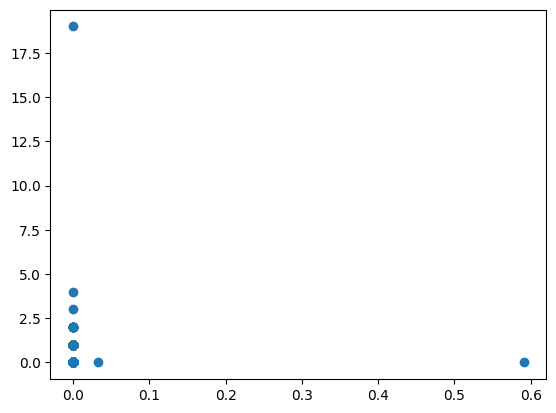

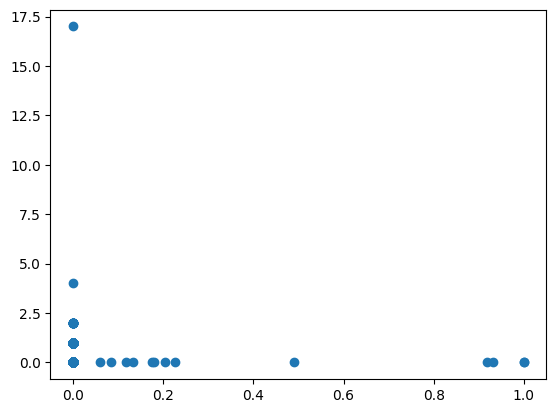

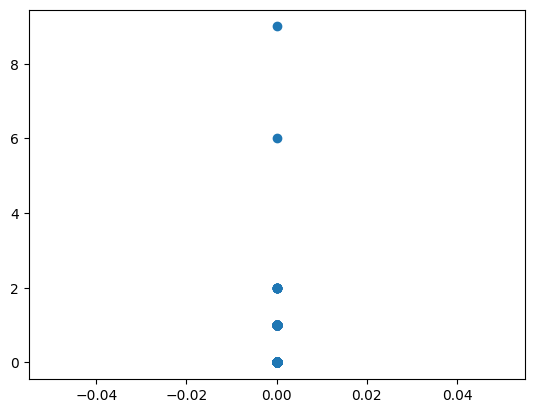

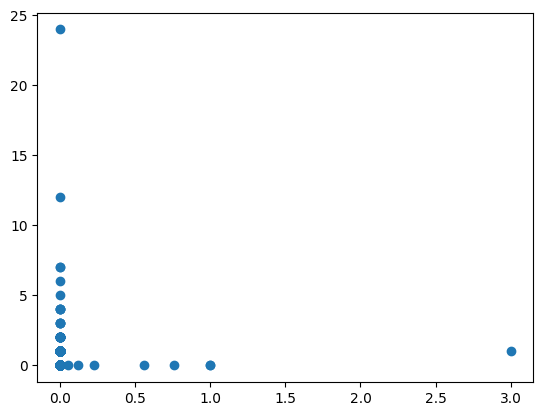

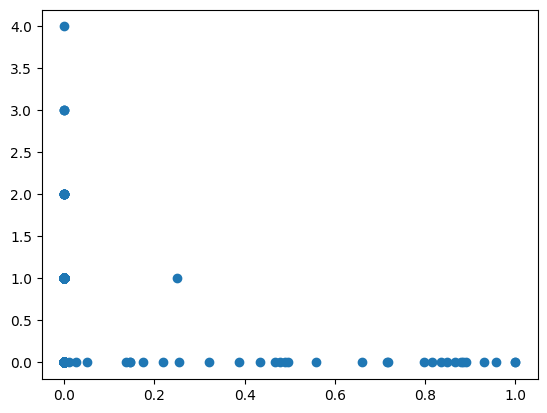

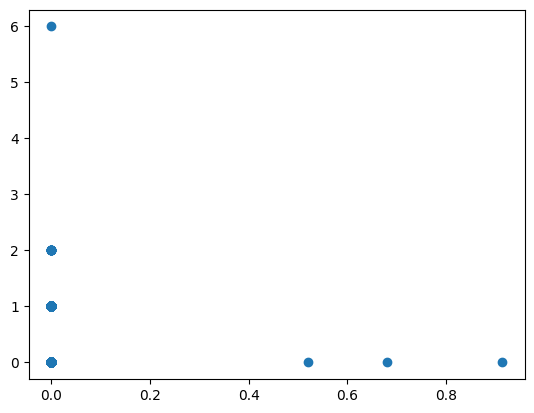

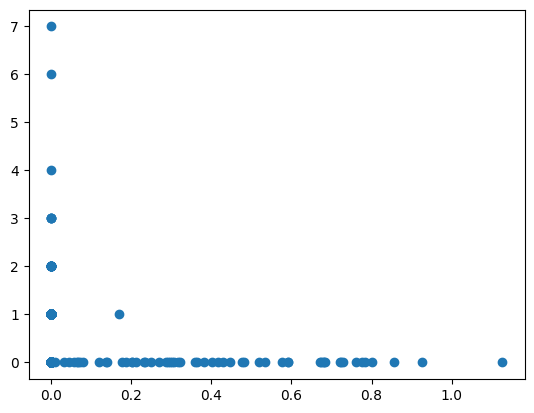

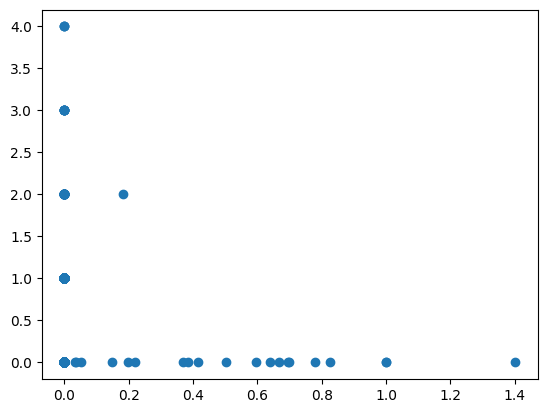

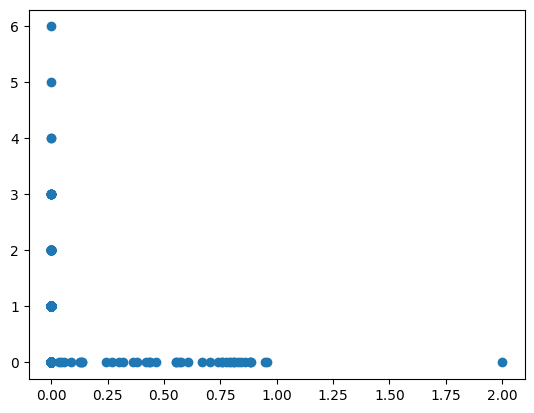

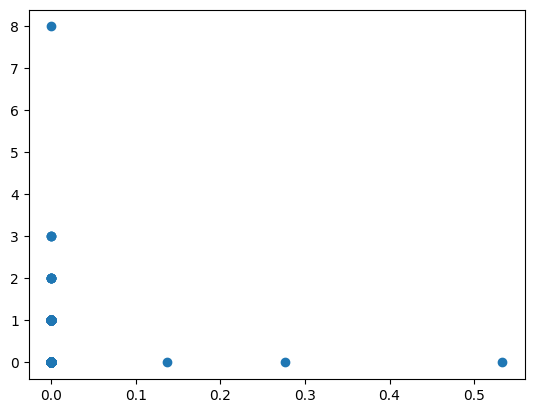

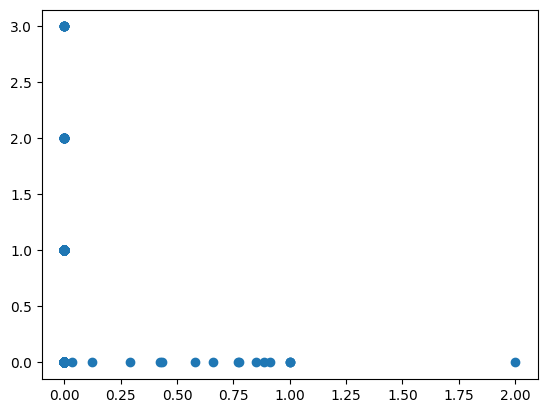

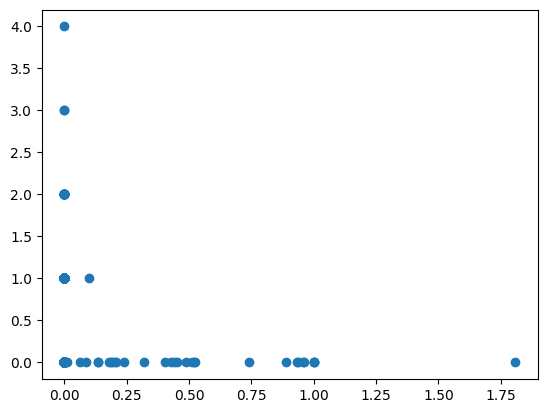

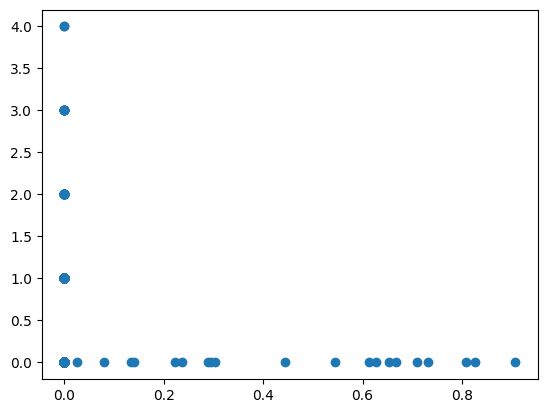

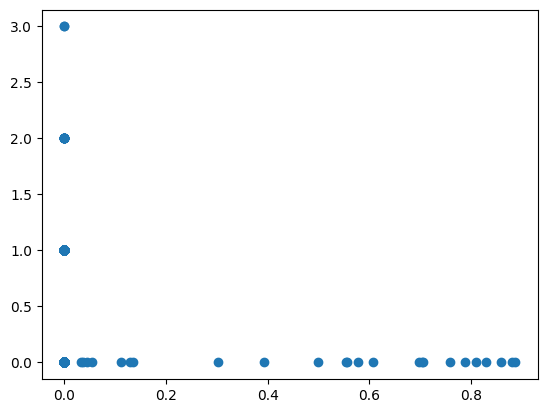

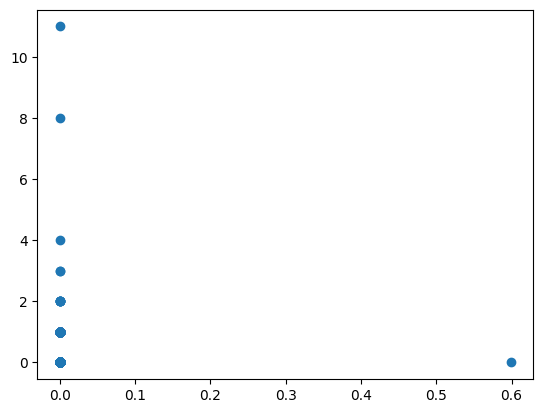

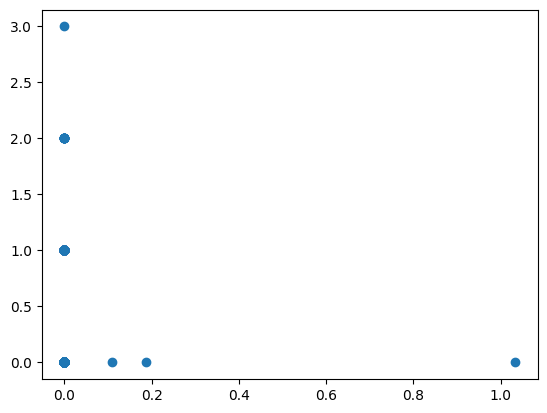

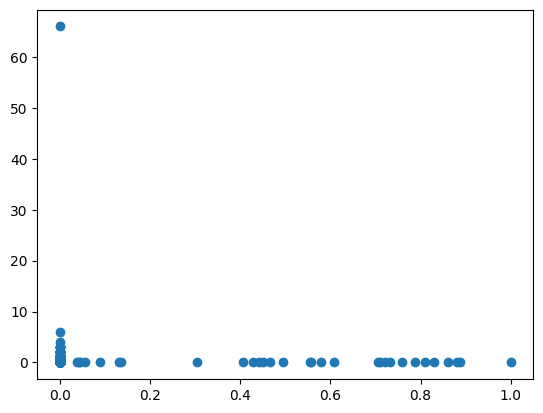

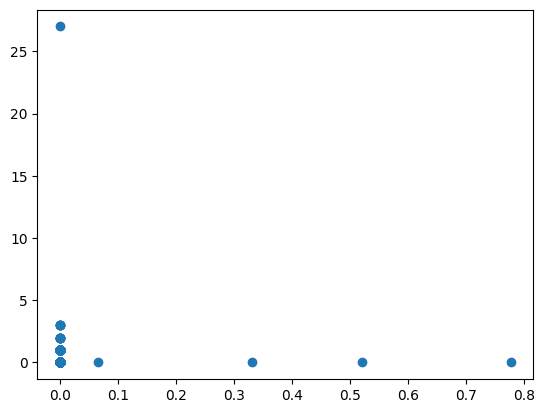

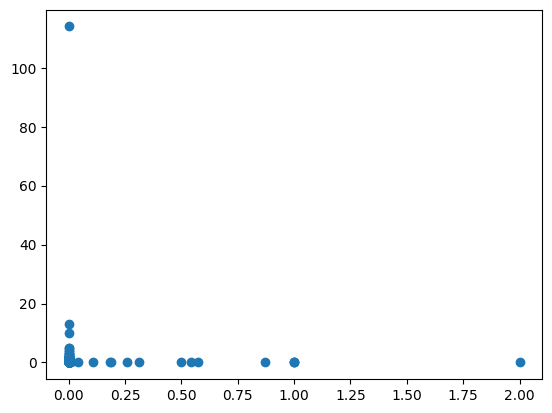

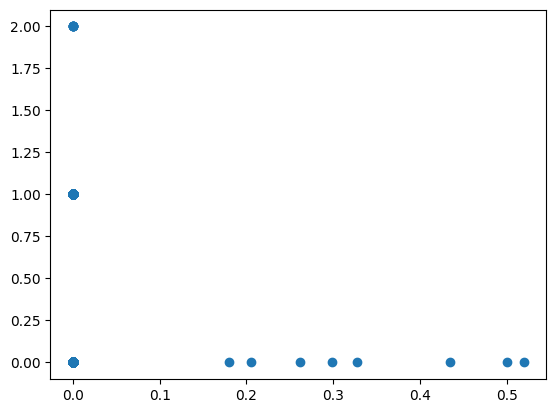

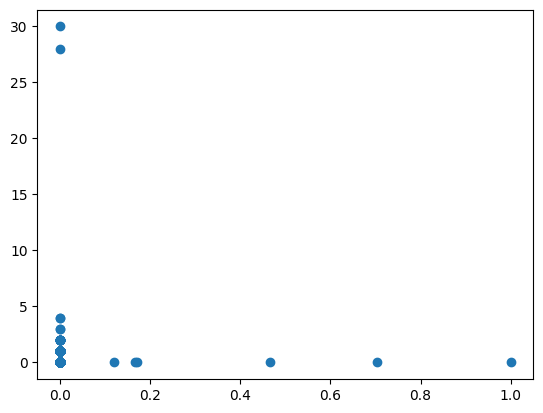

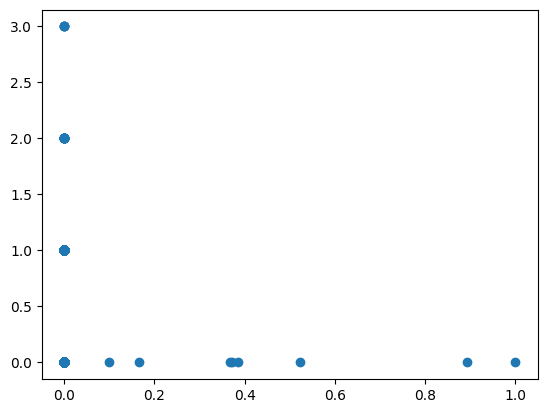

KeyboardInterrupt: 

In [29]:
for i in range(2000):
    R_est = np.asarray(expression[idx, i].flatten()).reshape(-1)
    
    plt.plot(accessibility.iloc[:, i].to_numpy(), R_est, 'o')
    plt.show()

In [47]:
for i in range(2000):
    R_est = R.dot(np.diag(TFA[:, i]))
    print(np.corrcoef(np.sum(np.abs(R_est[idx, :]), axis = 1), accessibility.iloc[:, i])[0, 1])

0.00598895286163171
-0.011058433261635477
-0.0047712597846825385
-0.012659438462924543
-0.009211481764239398
0.014161863004047107
-0.00651334760138948
-0.004674721806115117
-0.005867921739982023
-0.008932471772942754
0.006216331956844483
-0.008564910970935107
0.0015750095029918069
0.008899917872695862
-0.005291036757515709
0.0003385734749386815
-0.004872285063524041
-0.005663655981302738
-0.003305862803244107
-0.0032764793200386545
-0.0030532711025888174
-0.004702351788058731
-0.00014641990701809684
0.011925910412770333
-0.004307713477169831
0.003260652926320682
0.0027509697793464375
-0.0037772525755550646
-0.007571545052784693
0.006867044022116122
0.007183701031505925
-0.0014490919073552797
0.011401312411243909
0.0006633033478038765
0.0007104022331698852
0.01495636159360761
0.010741356786243833
-0.013154283530628579
0.0064512144743509355
0.0048532862573909775
-0.003998520492249181
-0.008176953977578857
-0.013216677860469608
-0.004908458809665323
-0.005978525522525251
-0.00108952966518

/home/soel/notebook/jupyterenv/lib/python3.10/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/soel/notebook/jupyterenv/lib/python3.10/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


nan
-0.015397314764304598
-0.005981415857999275
0.0001323014311167776
-0.008686343775229179
-0.008984472807016223
0.003872357914489136
0.0052435402499394134
-0.0033166825733471034
-0.017353741423508092
-0.0004980370796552669
5.9260249762318146e-05
0.007470753427804122
0.007885839047242169
-0.0028385538035218707
0.0021395829100935492
-0.0016955902347431774
-0.006482719869527909
0.007680269899763583
-0.007021010102035929
-0.008496680493677224
0.004368428868390968
0.004174368142190721
0.0020441131494609204
0.0022756501395480196
-0.003907584370881519
0.006568189549431471
0.001561277156321814
-0.001161822561593599
0.0025623829241064643
-0.008051360254147204
0.007970903383777818
0.001921652202053123
0.012070081894502796
0.019267850958360457
-0.005602423419129995
0.005998349224708246
0.001370889836696336
0.005123008455699148
-0.001792234366984509
0.004893391580474074
0.0035108357516797
-0.007122261669938296
0.010294662957894864
0.0014490742926047773
-0.005125845589776411
0.01733555141503724
-

0.0035217189662577154
0.0022710356215760465
0.0013405357096893085
0.01649707619256414
0.004285238881213381
0.014304324953582916
-0.002320481526767445
-0.0042632813577426895
0.0012719254437555576
0.0073828722378706454
0.0059714429144072465
0.002589766924331247
0.010304468192489678
-0.004834130263912238
0.0035466619212645304
0.004581693702495495
-0.005979557481654308
0.007921764276574981
0.002552498920977705
nan
-0.00297688308290543
-0.005880368378894496
0.000693027102021238
-0.005796902978742466
-0.010204064712261311
0.005975400385055083
0.0066046120761001645
0.0003207854981014495
8.505025588174984e-05
-0.007376495972976971
0.007249390187301194
-0.007222671083678232
0.0008418864325589686
-0.0029293701640840547
-0.002834972275541869
0.00118562242714812
-0.005419908152104238
-0.009993275708346879
-0.0012528427776464937
0.0068019150402267945
0.0009734056538780023
0.008613629624346494
-0.040724722769249565
0.0038876510182565185
-0.0007169569506294358
0.00981170844576148
-0.01104663900289018

-0.00903753092557177
0.005723348028532943
-0.001315225780576737
0.0012146870507948816
0.004933721537565065
0.005814649850966509
-0.0033936434301285218
0.0029898434567531725
-0.009629008613881846
0.005866930420750401
-0.0015967467570609504
-0.0015958094822362357
-0.002769732606413836
-0.0018597835765518309
0.013506326880341575
0.0057195201395185595
-0.010424965781066109
-0.007414710250103107
-0.0034553883849350805
-0.001880274922019801
-0.004865339528528579
-0.008706855201632236
0.0038522502143963203
0.002752119087505419
0.0018791567877771806
-0.0004275684462626328
-0.004449110099692049
-0.005489528663296087
-0.004667941525760591
-0.005641237455616775
0.0016865417706884355
0.013296485225649562
0.006644656107911352
-0.005788628544382609
0.013299682059797233
0.0006504443261108071
-0.00850954760924649
0.009961865077397576
-0.0009186837328719203
-0.0001974429636606277
0.0012762506573219944
0.004757403994590358
-0.00028699238229304555
-0.005924109641954871
-0.0034323138939638923
-0.013480183

-0.008110494391254906
0.00030483150179110366
0.005540419273927121
0.004301074153382385
-0.00187639129625194
0.012819524424633492
0.009034092644071413
-0.0075415143554081725
-0.005941899807245681
-0.000684927747894416
-0.006007073333135954
0.00011947332881030202
0.003907883766324928
-0.001648275538923543
-0.00474135347360566
-0.0031349371692860413
-0.0023855767661049073
0.0006590734705521381
0.0035781316976600808
0.001223198462647331
-0.00444066190590775
0.0004197631967451199
0.0011190729802646384
-0.011151309598244858
-0.0014669570059430523
-0.0026026040504381026
-0.002763142054671991
-0.00776571120474865
0.00887705737637303
0.004588886412953524
-0.005225229078594657
-0.0056930739580603115
-0.009773425557359626
0.005169195387785734
0.00519092874709375
-0.0005093550829986268
-0.0009472407289948568
0.0026697152904150644
0.005966220384262108
0.0064684230075063385
-0.0017544433628582325
-0.0027077214337277895
-0.0019334465854684345
-0.006781873706003277
-0.015084588832167269
-0.00086627797

0.00509084722848538
0.009584177026975612
-0.002598807294547041
0.005546557235506937
-0.007914109806823534
-0.008034276233416472
-0.0033823579074891657
-0.009527288804448223
-0.0021550023835635234
nan
-0.006940440335805074
0.002659886330009413
-0.006352661159432702
-0.001043603577500981
-0.0033526165832180157
0.021087237212156135
-0.0063654274721765495
-0.007669777044914576
-0.0008787682937256966
0.001648094004919045
-0.00707155354238792
-0.00648579396991906
0.00680533192792895
-0.006618448972212011
-0.0004255730319512942
0.000894497429855813
-0.005368487963921511
0.011635864328827492
-0.0075364680069211765
-0.010043007808205984
0.007735461616724123
0.0051411399550623975
-0.012125202514614264
-0.011541748961028627
-0.0023126719301893557
0.00011338445558840752
-0.0030361393776211537
-0.0060015324271061364
0.005261572373542544
0.002270130040371631
0.010137857427031207
0.004704886675867713
-8.480583564713956e-05
0.0021362770927382383
-0.0026210765304365627
-0.004868790318228315
-0.00392228

-0.013367184605238643
0.009825290856849996
nan
0.016593066448887864
0.001956860224086195
-0.0024174238847646835
-0.014966913888189144
-0.014730527505738346
-0.0017744790429733543
-0.011747607864091094
0.01419805829953132
0.0036815137683101243
-0.0026706929595740714
-0.0072761383773072615
0.0006688716874730571
0.005814851551167489
-0.0031231631949651074
-0.0014328256885967696
-0.01228196678372378
0.005090167306803355
0.004160242007100907
-0.0015145837493249614
0.0028463638765426156
-0.0010636370986107427
0.006098254914196823
-0.0026906451897397753
-0.007146907311305983
-0.005922784245440458
0.0006549365002212962
0.010945322942256046
0.00520083248584821
0.0035161661510674496
0.009117824346986127
0.00653482852325094
0.0038299061082806615
-0.00345808213574348
-0.0030487960179581375
0.012705298100810768
0.002986198516432004
-0.006990234158166226
0.006421130658555521
0.000607720849938123
nan
-0.00228589545108477
0.0030889445497056097
0.00048757478916612064
-0.005527264717910471
-0.0069925694

# Old Stuff

In [7]:
R = giraffe.Giraffe(expression, motif.to_numpy(), ppi + np.eye(ppi.shape[0]), iterations = 100, save_computation = True).get_regulation()

In [8]:
accessibility = pd.read_csv("data/adult_cerebrail_cortex/accessibility.txt", index_col = 0)
idx = []
for i in accessibility.index:
    idx.append(list(genes[0]).index(i))

In [12]:
chromatine = pd.read_csv("data/adult_cerebrail_cortex/chromatine.txt", index_col = 0)

In [18]:
real = np.corrcoef(np.sum(np.abs(R), axis = 1), chromatine.to_numpy().flatten())[0, 1]
h = []
for i in range(10000):
    tmp = chromatine.to_numpy().flatten()
    random.shuffle(tmp)
    h.append(np.corrcoef(np.sum(np.abs(R), axis = 1), tmp)[0, 1])

In [19]:
np.sum(h < real)

9895

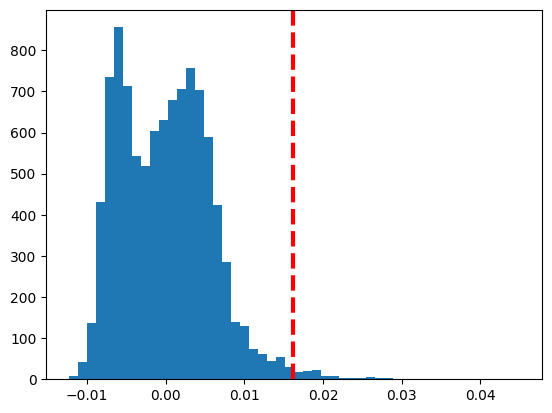

In [20]:
plt.hist(h, bins = 50)
plt.axvline(real, color='red', linestyle='dashed', linewidth=3)
plt.show()